# Methods of data preprocessing in machine learning
## Lab #1. Loading and primary data processing

## Objective: to learn how to perform primary data processing for a real dataset in the Anaconda environment using Jupyter Notebook.

### Work plan.

1. Load the dataset into a Python dataframe. Determine the dimensionality of the dataframe using the shape method.
2. Determine the fullness of the attributes. Build a bar chart based on the fullness of the attributes.
3. Identify attributes that could be output parameters based on the description, content, and fullness of the attributes.
4. Identify the 3 least full attributes. Analyze the possible impact of these attributes on the readmitted variable.
5. Analyze the dataset for complete duplicates. Clean up duplicates.
6. Print basic statistics for numeric and categorical attributes. What datatype should the attributes encounter_id, patient_nbr, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty be? Why? Will these attributes be meaningful when training the model? Perform type conversion according to your reasoning.
7. Re-derive the features after transforming the attributes. Draw conclusions about the influence of the attribute values ​​on the readmitted variable by estimating the proportion of values ​​filled with the most frequently occurring value.
8. Take several values ​​that potentially influence the readmitted variable and print the numerical distribution of unique values ​​for each attribute across the dataset. Build pie charts for each attribute. Draw conclusions about the influence of the attributes.
9. Take several values ​​that potentially do not influence the readmitted variable and print the numerical distribution of unique values ​​for each attribute across the dataset. Build pie charts for each attribute. Draw conclusions about the influence of the attributes.
10. Build a pie chart for the unique attributes of the readmitted variable. Draw conclusions about the uniformity of the distribution of the occurring values.
11. Take one of the attributes that influence the readmitted variable, group the attributes and count pairs of values ​​by data frame. Calculate the percentage of the obtained statistics to the total amount of data. Output a bar chart.
12. Draw conclusions and generate a report similar to the requirements described in the first laboratory work

## Progress of work.

## 1. Load the dataset into a Python dataframe. Determine the dimensions of the dataframe using the shape method.

In [7]:
import pandas as pd
import numpy as np
df = pd.read_csv('/home/nikita/Рабочий стол/MTUCI/мл/labs1/Lab2/НД_ЛР_2(WS) диабет_повторная_госпит.csv', sep=',', na_values='null',header=0)
#print (df[0:60:10])

Let's make sure that the dataset we loaded is a pandas dataframe.

In [9]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Let's check the dataset dimensionality. 50 data attributes. 101766 sets (tuples).

In [11]:
df.shape

(101766, 50)

For data visualization, it is better to use the .head() method of the pandas library. Outputs the first 5 rows of the dataset (by default). But first, let's increase the number of data columns in the output when using the pandas library

In [13]:
pd.options.display.max_columns=100
pd.get_option("display.max_columns")

100

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


Note also that some attributes are missing values ​​(there is a "?" symbol instead). This means that some data is missing, and their absence may affect the final data analysis.

Let's get general statistics for the dataset. In the first case, for quantitative attributes, where:
* count is the number of filled attribute values;
* mean is the average attribute value;
* std is the root mean square value of the attribute;
* min is the minimum attribute value.
* 25%, 75% are the lower and upper quantiles of the attribute;
* 50% is the median of the attribute;
* max is the maximum attribute value.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


And statistics on qualitative attributes.
* count – the number of filled attribute values;
* unique – the number of unique attribute values;
* top – the most frequently occurring value;
* freq – the frequency of occurrence of a value from top

In [20]:
df.describe(include=['object']).T    

,count,unique,top,freq
race,101766,6,Caucasian,76099
gender,101766,3,Female,54708
age,101766,10,[70-80),26068
weight,101766,10,?,98569
payer_code,101766,18,?,40256
medical_specialty,101766,73,?,49949
diag_1,101766,717,428,6862
diag_2,101766,749,276,6752
diag_3,101766,790,250,11555
max_glu_serum,5346,3,Norm,2597


Sometimes it is useful to output both quantitative and qualitative results in one query.

In [23]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


The appearance of the "?" signs in the report is precisely due to missing data, which turned out to be a popular value for some attributes. In addition, there are attributes that are less than half filled.

Before converting data, it is necessary to obtain information on attributes.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Data loading output:

Data loaded, 101766 data sets, 50 attributes.
Some attributes are not filled in, some are "?".

13 attributes of type int(64) - numeric, quantitative.
37 attributes of type object - qualitative (this data type differs from categorical, loaded by default as "object").

## 5. Analyze the data set for complete duplicates of records. Clear duplicate records.
Note: it was decided that further work should begin with preliminary, primary data processing. So that incorrect content does not affect the result.

We get rid of duplicates. According to preliminary data (from the dataset and its description), the unique attributes are 0 - encounter_id (UIN of the insurance case) and 1 - patient_nbr (UIN of the patient)

In [32]:
print ("Number of rows before removing duplicates = ", len(df))
df = df.drop_duplicates(keep = 'first')
print ("Number of rows after removing duplicates = ", len(df))
print ("Number of unique elements in the \"encounter_id\" attribute = ", len(df['encounter_id'].unique()))
print ("Number of unique elements in the \"patient_nbr\" attribute = ", len(df['patient_nbr'].unique()))
df.head(5)

Number of rows before removing duplicates =  101766
Number of rows after removing duplicates =  101766
Number of unique elements in the "encounter_id" attribute =  101766
Number of unique elements in the "patient_nbr" attribute =  71518


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


No complete duplicate data was found.

By the attribute `encounter_id` (Insurance Case ID), all data is unique, while by the attribute `patient_nbr` (Patient ID), there are duplicates.

This aligns with the description, as the medical insurance case identifier should be unique for each instance of medical care, while the patient number is unique only for a specific individual.

Let's check for matches across individual attributes.

In [35]:
df.value_counts('encounter_id', sort=False, ascending=True)

encounter_id
12522        1
15738        1
16680        1
28236        1
35754        1
            ..
443847548    1
443847782    1
443854148    1
443857166    1
443867222    1
Name: count, Length: 101766, dtype: int64

In [37]:
df.value_counts('patient_nbr', sort=True)

patient_nbr
88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
34935156      1
34935795      1
34935804      1
34937658      1
189502619     1
Name: count, Length: 71518, dtype: int64

### Conclusion on Duplicate Analysis:
No complete duplicate records were found in this dataset.

As expected, the Insurance Case ID (encounter_id) serves as a unique key for this dataset. It has no duplicates or missing values and contains only numerical (int64) data.

The Patient ID (patient_nbr) has duplicates because the same patient may visit the medical institution multiple times, making it unsuitable for identifying data uniquely.

## 2. Determine the completeness of attributes. Create a bar chart based on the completeness of attributes.
### Additional task: Replace "?" with "null". ("Preliminarily, using the `value_counts()` method, calculate in a loop for all attributes the number of unique values (excluding `encounter_id` and similar). Replace all 'incorrect values' with NaN.")

Before determining the completeness of attributes, it is necessary to replace incorrect data ("?") with "null" (NaN).

In this way we can only look at part of the data; we need to extract all possible values.

In [41]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


Let's output all possible variants of attribute values. We'll output values ​​for attributes with a large set of different data as a separate list.

In [43]:
few_values = {}

for col in df:
    if col not in {'encounter_id', 'patient_nbr', 'diag_3', 'diag_2', 'diag_1', 
                   'num_lab_procedures'}:
        few_values[col] = pd.Series(df[col].value_counts().index.values)
        
few_values_df = pd.DataFrame(few_values).fillna('')
few_values_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
race,Caucasian,AfricanAmerican,?,Hispanic,Other,Asian,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gender,Female,Male,Unknown/Invalid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
age,[70-80),[60-70),[50-60),[80-90),[40-50),[30-40),[90-100),[20-30),[10-20),[0-10),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
weight,?,[75-100),[50-75),[100-125),[125-150),[25-50),[0-25),[150-175),[175-200),>200,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admission_type_id,1.0,3.0,2.0,6.0,5.0,8.0,7.0,4.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
discharge_disposition_id,1.0,3.0,6.0,18.0,2.0,22.0,11.0,5.0,25.0,4.0,7.0,23.0,13.0,14.0,28.0,8.0,15.0,24.0,9.0,17.0,16.0,19.0,10.0,27.0,12.0,20.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admission_source_id,7.0,1.0,17.0,4.0,6.0,2.0,5.0,3.0,20.0,9.0,8.0,22.0,10.0,14.0,11.0,25.0,13.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
time_in_hospital,3.0,2.0,1.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
payer_code,?,MC,HM,SP,BC,MD,CP,UN,CM,OG,PO,DM,CH,WC,OT,MP,SI,FR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
medical_specialty,?,InternalMedicine,Emergency/Trauma,Family/GeneralPractice,Cardiology,Surgery-General,Nephrology,Orthopedics,Orthopedics-Reconstructive,Radiologist,Pulmonology,Psychiatry,Urology,ObstetricsandGynecology,Surgery-Cardiovascular/Thoracic,Gastroenterology,Surgery-Vascular,Surgery-Neuro,PhysicalMedicineandRehabilitation,Oncology,Pediatrics,Hematology/Oncology,Neurology,Pediatrics-Endocrinology,Otolaryngology,Endocrinology,Surgery-Thoracic,Psychology,Podiatry,Surgery-Cardiovascular,Pediatrics-CriticalCare,Hematology,Gynecology,Hospitalist,Radiology,Surgeon,Surgery-Plastic,Osteopath,Ophthalmology,InfectiousDiseases,SurgicalSpecialty,Obsterics&Gynecology-GynecologicOnco,Pediatrics-Pulmonology,Obstetrics,Anesthesiology-Pediatric,Rheumatology,Pathology,OutreachServices,Anesthesiology,Surgery-Maxillofacial,Surgery-Colon&Rectal,PhysicianNotFound,Pediatrics-Neurology,Endocrinology-Metabolism,Surgery-Pediatric,AllergyandImmunology,Cardiology-Pediatric,Psychiatry-Child/Adolescent,DCPTEAM,Pediatrics-Hematology-Oncology,Dentistry,Pediatrics-EmergencyMedicine,Pediatrics-AllergyandImmunology,Resident,Surgery-PlasticwithinHeadandNeck,Proctology,Psychiatry-Addictive,Dermatology,SportsMedicine,Speech,Perinatology,Neurophysiology,Pediatrics-InfectiousDiseases,,


According to the data, the attributes contain invalid value options: "Unknown/Invalid" in gender, "?" in the attributes race, weight, payment type, medical specialty.

In [45]:
many_values = {}
for col in df:
    if col in {'diag_3', 'diag_2', 'diag_1', 'num_lab_procedures'}:
        many_values[col] = pd.Series(df[col].value_counts().index.values)
many_values_df = pd.DataFrame(many_values).fillna('')
many_values_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789
num_lab_procedures,1.0,43.0,44.0,45.0,38.0,40.0,46.0,41.0,42.0,47.0,39.0,37.0,49.0,48.0,36.0,51.0,50.0,35.0,54.0,56.0,52.0,55.0,53.0,57.0,58.0,34.0,61.0,59.0,60.0,63.0,62.0,30.0,29.0,32.0,64.0,31.0,33.0,65.0,66.0,2.0,26.0,67.0,28.0,25.0,68.0,69.0,19.0,9.0,10.0,23.0,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
diag_1,428,414,786,410,486,427,491,715,682,434,780,996,276,38,250.8,599,584,V57,250.6,518,820,577,493,435,562,574,296,560,250.7,250.13,440,433,998,722,250.02,578,250.11,507,789,453,530,8,403,535,415,402,295,724,458,162,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
diag_2,276,428,250,427,401,496,599,403,414,411,250.02,707,585,584,491,250.01,285,780,425,682,486,518,424,413,250.6,493,305,786,280,998,410,511,785,38,996,272,571,197,V45,295,440,577,162,560,788,997,41,?,578,453,...,832,800,605,35,E918,46,V13,E850,927,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
diag_3,250,401,276,428,427,414,496,403,585,272,599,?,V45,250.02,707,780,285,425,250.6,424,584,305,250.01,682,518,41,493,278,530,786,491,486,244,V58,250.4,411,280,357,785,287,197,511,402,787,788,412,593,V15,413,438,...,744,315,E883,811,308,697,524,602,970,395,243,951,732,164,485,893,146,186,250.31,674,226,365.44,122,955,755,E894,475,880,930,E915,381,361,387,872,E822,195,E945,E815,542,853,E882,754,890,E949,992,657,684,603,E826,971


Another meaning of "?" is found in diagnoses.

In [48]:
others_values = {}
for col in df:
    if col in {'encounter_id', 'patient_nbr'}:
        others_values[col] = pd.Series(df[col].value_counts().index.values)
others_values_df = pd.DataFrame(others_values).fillna('')
others_values_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,101716,101717,101718,101719,101720,101721,101722,101723,101724,101725,101726,101727,101728,101729,101730,101731,101732,101733,101734,101735,101736,101737,101738,101739,101740,101741,101742,101743,101744,101745,101746,101747,101748,101749,101750,101751,101752,101753,101754,101755,101756,101757,101758,101759,101760,101761,101762,101763,101764,101765
encounter_id,2278392,190792044,190790070,190789722,190786806,190785018,190781412,190775886,190764504,190760322,190744902,190737804,190736802,190725726,190717032,190712136,190710012,190709730,190709022,190707654,190705926,190700772,190700028,190791024,190792608,190698912,190794822,190891596,190881192,190879218,190858332,190837026,190834980,190830492,190828308,190826484,190823874,190820028,190819788,190803516,190803498,190801872,190801560,190800708,190799844,190799070,190798314,190798254,190699332,190698234,...,106706472,106706106,106704924,106703832,106634106,106632576,106631718,106631262,106629828,106629036,106628670,106628292,106625700,106622784,106620762,106619604,106619592,106619352,106618422,106614210,106611048,106610022,106607706,106607478,106605420,106635534,106635582,106635666,106681734,106703064,106703058,106701786,106699590,106697604,106696572,106691580,106684962,106683222,106680030,106637376,106678956,106677780,106673364,106671384,106667544,106665324,106657776,106644876,106644474,443867222
patient_nbr,88785891.0,43140906.0,1660293.0,88227540.0,23199021.0,23643405.0,84428613.0,92709351.0,88789707.0,29903877.0,90609804.0,89472402.0,23398488.0,37096866.0,88479036.0,88681950.0,97391007.0,91751121.0,24011577.0,3481272.0,3401055.0,91160280.0,84348792.0,106757478.0,90489195.0,41699412.0,384939.0,84676248.0,41617368.0,90164655.0,362610.0,16156494.0,34248474.0,84397842.0,86931513.0,2486844.0,110463471.0,41717169.0,85232619.0,88410879.0,91776843.0,40595031.0,103832127.0,62352252.0,97019901.0,40373325.0,25151994.0,109448541.0,90052641.0,80811567.0,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


There is no point in considering the UIN of the insurance case and the patient. Also, this procedure could have been performed in a cycle.

In [50]:
for col in df.columns:
    print(col,": ",len(df[col].unique()),"unique values\n",df[col].unique(),"\n")

encounter_id :  101766 unique values
 [  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr :  71518 unique values
 [  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race :  6 unique values
 ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender :  3 unique values
 ['Female' 'Male' 'Unknown/Invalid'] 

age :  10 unique values
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight :  10 unique values
 ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id :  8 unique values
 [6 1 2 3 4 5 8 7] 

discharge_disposition_id :  26 unique values
 [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id :  17 unique values
 [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital :  14 unique values
 [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_

С помощью этого метода мы нашли еще значения "nan" у атрибутов max_glu_serum и A1Cresult, которые можно спутать с NaN - данные отсутствуют. Заменим эти значения на "NoData" (не получилось)

Первым делом, заменим значени "none" в атрибутах max_glu_serum и A1Cresult на "NoTest" (не проводился тест). Но в этом выводе я не уверен и не стал добавлять в работу.

In [54]:
df__temp = df.copy()
df__temp['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'NoTest')
df__temp['A1Cresult'] = df['A1Cresult'].replace(np.nan, 'NoTest')

Let's derive statistics on the lost data. Where, race, weight, payment type, medical specialty, diagnoses (1,2,3) - this is the symbol "?". Gender is Unknown/Invalid. And in the attributes citoglipton, examide, metformin-pioglitazone, metformin-rosiglitazone - the value is No (no data, but this data will not be replaced with NaN)

In [56]:
def missing_val(df):
    print("% of missing values for race: ",(len(df.loc[df['race'] == '?'])/len(df))*100,"%")
    print("% of missing values for gender: ",(len(df.loc[df['gender'] == 'Unknown/Invalid'])/len(df))*100,"%")
    print("% of missing values for weight: ",(len(df.loc[df['weight'] == '?'])/len(df))*100,"%")
    print("% of missing values for payer_code: ",(len(df.loc[df['payer_code'] == '?'])/len(df))*100,"%")
    print("% of missing values for medical_specialty: ",(len(df.loc[df['medical_specialty'] == '?'])/len(df))*100,"%")
    print("% of missing values for diag_1: ",(len(df.loc[df['diag_1'] == '?'])/len(df))*100,"%")
    print("% of missing values for diag_2: ",(len(df.loc[df['diag_2'] == '?'])/len(df))*100,"%")
    print("% of missing values for diag_3: ",(len(df.loc[df['diag_3'] == '?'])/len(df))*100,"%")
    print("% of missing values for citoglipton: ",(len(df.loc[df['citoglipton'] == 'No'])/len(df))*100,"%")
    print("% of missing values for examide: ",(len(df.loc[df['examide'] == 'No'])/len(df))*100,"%")
    print("% of missing values for metformin-pioglitazone: ",(len(df.loc[df['metformin-pioglitazone'] == 'No'])/len(df))*100,"%")
    print("% of missing values for metformin-rosiglitazone: ",(len(df.loc[df['metformin-rosiglitazone'] == 'No'])/len(df))*100,"%")
    print('дополнительно')
    print("% of missing values for max_glu_serum: ",(len(df__temp.loc[df__temp['max_glu_serum'] == 'NoTest'])/len(df__temp))*100,"%")
    print("% of missing values for A1Cresult: ",(len(df__temp.loc[df__temp['A1Cresult'] == 'NoTest'])/len(df__temp))*100,"%")
    return 0
missing_val(df)

% of missing values for race:  2.2335554114340743 %
% of missing values for gender:  0.002947939390366134 %
% of missing values for weight:  96.85847925633315 %
% of missing values for payer_code:  39.5574160328597 %
% of missing values for medical_specialty:  49.08220820313268 %
% of missing values for diag_1:  0.02063557573256294 %
% of missing values for diag_2:  0.3517874339170253 %
% of missing values for diag_3:  1.398305917497003 %
% of missing values for citoglipton:  100.0 %
% of missing values for examide:  100.0 %
% of missing values for metformin-pioglitazone:  99.99901735353654 %
% of missing values for metformin-rosiglitazone:  99.99803470707309 %
дополнительно
% of missing values for max_glu_serum:  94.74677200636755 %
% of missing values for A1Cresult:  83.27732248491637 %


0

Let's replace the incorrect values ​​"?" and "Unknown/Invalid" with simply "missing"

In [58]:
data = df.replace('?', np.NaN)
data = data.replace('Unknown/Invalid', np.NaN)
data = data.replace('No', np.NaN)
#data = data.replace('nan', 'NoData') # и это не сработало
temp = data['max_glu_serum'].unique()
print(temp) # 

[nan '>300' 'Norm' '>200']


/tmp/ipykernel_12569/1482347318.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('No', np.NaN)


In [60]:
for col in data.columns:
    print(col,": ",len(data[col].unique()),"unique values\n",data[col].unique(),"\n")

encounter_id :  101766 unique values
 [  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr :  71518 unique values
 [  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race :  6 unique values
 ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic'] 

gender :  3 unique values
 ['Female' 'Male' nan] 

age :  10 unique values
 ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight :  10 unique values
 [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id :  8 unique values
 [6 1 2 3 4 5 8 7] 

discharge_disposition_id :  26 unique values
 [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id :  17 unique values
 [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital :  14 unique values
 [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code :  18 uni

Now we can determine the fullness of attributes. Note that we are now working with an updated dataset data.

In [65]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101763,2,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


We can already draw a conclusion about the fullness of the attributes, but it will be more visual to build a column chart, where the attributes are indicated on one axis, and their fullness (in numerical or percentage form) on the other. For ease of work, it will be more convenient to create a separate list of attributes, in transposed form. We will do the same with the original data, for subsequent comparison.

In the next block of code, we will create two data frames from the statistical data of the original and processed datasets, to simplify future work.

In [67]:
data_describe = data.describe(include='all')
data_count = data_describe.transpose()

df_describe = df.describe(include='all')
df_count = df_describe.transpose()

df__temp_d = df__temp.describe(include='all')
df__temp_с = df__temp_d.transpose()
#df_count.head(50)
#data_count.head(50)

Let's put the tests in a separate list. Perhaps it would be best to combine them into one attribute using some rule. Combining medical tests allows you to get more complete and reliable information about the patient's health, which helps in diagnosis and choosing the optimal treatment plan.

In [69]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
               'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
               'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
               'miglitol', 'troglitazone', 'tolazamide', 'examide', 
               'citoglipton', 'insulin', 'glyburide-metformin', 
               'glipizide-metformin','glimepiride-pioglitazone', 
               'metformin-rosiglitazone', 'metformin-pioglitazone']
print(f"The dataset lists {len(medications)} attributes of analysis types.")

The dataset lists 23 attributes of analysis types.


To visually display the data on attribute fullness on the histogram, we will perform several transformations. We will put the list of attributes in a separate variable. And the attribute values ​​in another list. Additionally, we will create a list of colors, where blue is if the attribute is completely filled, green is more than 70%, red is less than 20%, orange is all the rest.

In [71]:
atr = data.columns.tolist()
count = data_count['count'].tolist()
df_count = df_count['count'].tolist()
df__temp_с = df__temp_с['count'].tolist()
#for atribute in atr:
#    print (atribute)
#for count_i in count:
#    print (count_i)
#atr_i = [lambda x = x: x for x in range(1,len(atr))]

bar_color = atr.copy()
maxC = max(count)
for i in range(0,len(atr)):
    bar_color[i] = "blue"
    if count[i] < maxC:
        bar_color[i] = "green"
    if count[i] <= maxC*0.7:
        bar_color[i] = "orange"
    if count[i] < maxC*0.2:
        bar_color[i] = "red"
print(atr[5])
print(count[5])
print(bar_color[5])
print(df_count[5])

weight
3197
red
101766


And the visual representation of the fullness of attributes (in gray - data before replacing incorrect values, in purple - None data in tests):

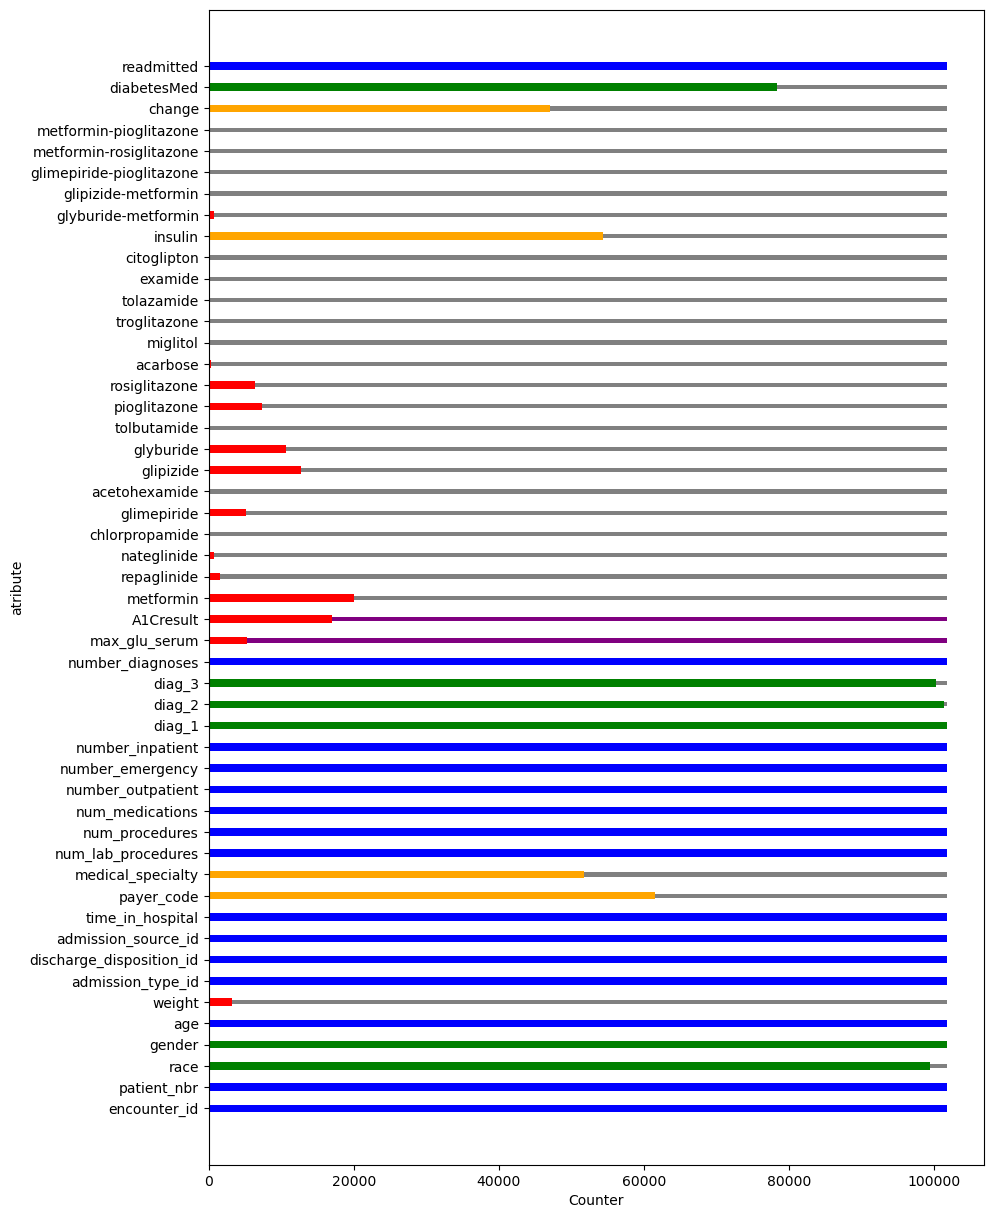

In [75]:
%matplotlib inline    
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(10,15)
plt.barh(y = atr, width = df__temp_с, align='center', height = 0.2, color = "purple")
plt.barh(y = atr, width = df_count, align='center', height = 0.2, color = "grey")
plt.barh(y = atr, width = count, align='center', height = 0.35, color = bar_color)
#print(atr)
#plt.hist(count)
plt.ylabel("atribute")
plt.xlabel("Counter")
plt.show()

For ease of data analysis, the completeness values can be converted to percentages, but this has already been done for some attributes above. The color differentiation already allows us to draw conclusions about the completeness of the attributes. The gray color on the histogram indicates the values in the original dataset before removing the incorrect data "?" and "Unknown/Invalid".

### Conclusion on Attribute Completeness

Most of the significant attributes are fully specified. Some attributes (such as race, gender, primary, secondary, and additional diagnoses) are specified for more than 70%, and they will have a minor impact on the analysis results. However, diagnostic data can potentially influence the `readmitted` variable (readmission). Attributes like `medical_speciality` (the treating physician's specialty) and `payer_code` (payment type) are filled in less than 70%. These data could have influenced the analysis results, but according to the description, they are not indicative of the patient's history and have many possible values that need to be processed separately. Such data should not be considered in the analysis initially.

The `weight` attribute, according to the description, can be considered influential on the `readmitted` variable, referring to WHO data (about the increased risk of diabetes in people suffering from obesity and overweight). However, in the dataset being studied, most of the patient weight data is missing (marked with "?"). If this data is used in the analysis, the result may be significantly distorted and lead to incorrect conclusions. And we cannot replace the patient weight data with other data.

The attributes `A1Cresult` (A1C test result) and `max_glu_serum` (glucose serum test result) are shown on the histogram as being filled in less than 20%. However, according to the attribute descriptions, the values for these two tests include "None" as one of the possible responses (no test was performed), which coincides with the "NaN" value in the pandas library as missing data. Therefore, these values (None) should have been replaced with unique values that do not affect the collection of statistics./

## 3. Select attributes that could be output parameters based on the description, content and fullness of attributes

### 10. Construct a pie chart for unique values ​​of the readmitted variable. Draw conclusions about the uniformity of the distribution of the values ​​encountered.

Based on the description of the dataset and the completeness of the attributes, one attribute readmitted (re-hospitalization) can be distinguished as an output parameter. The description of this attribute specifies value options: re-hospitalization earlier than 30 days after discharge, not earlier than 30 days after discharge, and no re-hospitalization.

Additionally, a new attribute could be introduced that shows whether there was a re-hospitalization at all or not (True / False).

For a visual display, we will indicate this data on a histogram (and a pie chart).

readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


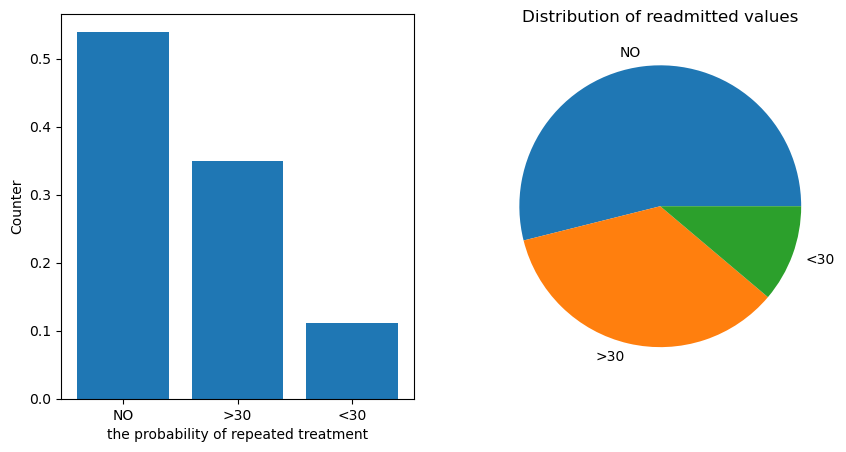

In [82]:
 
# notebook - if you need to interact with the plot    
fig = plt.figure()
fig.set_size_inches(10,5)
rm_uniq = data['readmitted'].unique()
rm_count = data.value_counts(['readmitted'], normalize = True)
print(rm_count)
rm_count = rm_count.tolist()

fig.add_subplot(1, 2, 1)  
plt.bar(rm_uniq, rm_count)
plt.ylabel("Counter")
plt.xlabel("the probability of repeated treatment")
fig.add_subplot(1, 2, 2) 
plt.pie(rm_count, labels = rm_uniq)
plt.title('Distribution of readmitted values')
plt.show()

And the option readmitted_bool (True / False)

['False', 'True']
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
[0.5391191557101586, 0.4608808442898414]


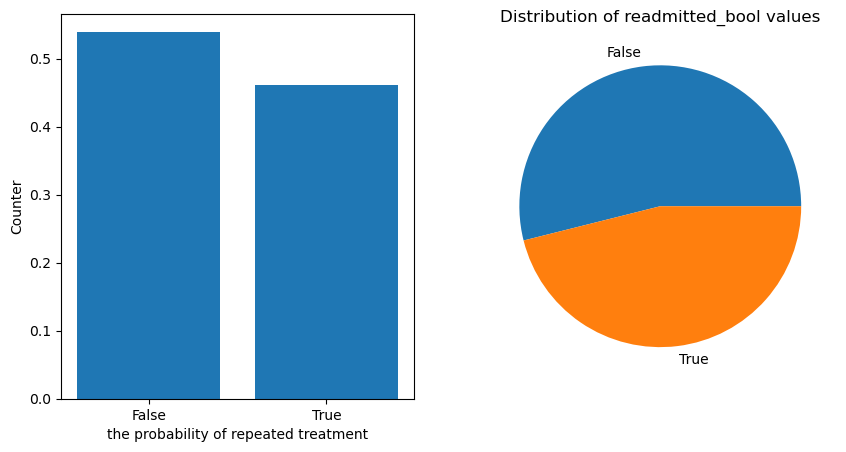

In [85]:
fig = plt.figure()
fig.set_size_inches(10,5)
rmb_uniq = ['False','True']
print(rmb_uniq)
rm_count = data.value_counts(['readmitted'], normalize = True)
print(rm_count)
rmb_count = [rm_count['NO'], rm_count['>30'] + rm_count['<30']]
print(rmb_count)
fig.add_subplot(1, 2, 1)  
plt.bar(rmb_uniq, rmb_count)
plt.ylabel("Counter")
plt.xlabel("the probability of repeated treatment")
fig.add_subplot(1, 2, 2) 
plt.pie(rmb_count, labels = rmb_uniq)
plt.title('Distribution of readmitted_bool values')
plt.show()

### Output attribute selection conclusion:
The output attribute of the dataset is "readmitted" as a criterion for rehospitalization based on its completeness, significance, and description.

A new parameter "readmitted_bool" could be added as an additional criterion, since it is not based on insurance conditions (calculation of the probability of new insurance cases).

If we were considering the full dataset, and not the pre-processed one, we could select "treatment success" as the output attribute, as the discharge_disposition_id attribute (discharge reason), or the need to prescribe diabetes medication "diabetesMed" or change the prescription "change". For other tasks, we could consider the dataset from the side of "how many days the patient spent in the hospital, all other things being equal" or examine the A1Cresult attribute, as the need to conduct a hemoglobin test, but since the A1Cresult attribute is not filled in correctly, it is not advisable to consider it.

## 4. Select the 3 least filled attributes. Analyze the possible impact of these attributes on the readmitted variable

In the previous stages of the lab work, we found out that the least filled attributes are: weight, medical_specialty, and payment type (payer_code). (The A1Cresult and max_glu_serum attributes are filled with the incorrect value None and are not considered less filled)

This work does not involve a deep study of the influence of attributes on the output variable, but after making several queries in search engines and reading the description of the dataset, we can make a preliminary conclusion: weight affects the health of patients, and the specialty of the attending physician affects the effectiveness of treatment. The type of payment can also affect, since it includes insurance cases.

The first step is to obtain information on the unique values ​​of the attributes. General and individual statistics:

In [90]:
data[['weight', 'medical_specialty', 'payer_code', 'readmitted']].describe()

,weight,medical_specialty,payer_code,readmitted
count,3197,51817,61510,101766
unique,9,72,17,3
top,[75-100),InternalMedicine,MC,NO
freq,1336,14635,32439,54864


In [91]:
print(data.value_counts(['weight', 'medical_specialty', 'payer_code', 'readmitted']))

weight     medical_specialty  payer_code  readmitted
[75-100)   Cardiology         MC          >30           52
                                          NO            40
           InternalMedicine   MC          >30           37
[50-75)    InternalMedicine   MC          NO            31
[75-100)   Surgery-General    MC          NO            30
                                                        ..
[125-150)  InternalMedicine   MC          <30            1
                              HM          <30            1
                              DM          NO             1
                                          >30            1
[0-25)     Cardiology         BC          >30            1
Name: count, Length: 291, dtype: int64


In [92]:
weight = data.value_counts('weight', normalize = False, sort = True)
print(weight)
print(len(weight))

weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64
9


In [93]:
weight = data.value_counts('medical_specialty', normalize = False, sort = True)
print(weight)
print(len(weight))

medical_specialty
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Dermatology                             1
Surgery-PlasticwithinHeadandNeck        1
Proctology                              1
Psychiatry-Addictive                    1
SportsMedicine                          1
Name: count, Length: 72, dtype: int64
72


In [94]:
weight = data.value_counts('payer_code', normalize = False, sort = True)
print(weight)
print(len(weight))

payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
17


In [95]:
    print("% of missing values for weight: ",(len(df.loc[df['weight'] == '?'])/len(df))*100,"%")
    print("% of missing values for payer_code: ",(len(df.loc[df['payer_code'] == '?'])/len(df))*100,"%")
    print("% of missing values for medical_specialty: ",(len(df.loc[df['medical_specialty'] == '?'])/len(df))*100,"%")

% of missing values for weight:  96.85847925633315 %
% of missing values for payer_code:  39.5574160328597 %
% of missing values for medical_specialty:  49.08220820313268 %


### Conclusion on the impact of unfilled attributes on the result.
Less filled attributes are the whole, the specialty of the attending physician and the type of payment. Their percentage of filling is shown above. Although these attributes affect the output parameter in one form or another, they should not be taken into account when identifying the dependence. In addition, the data on payment and the specialty of the physician have many variants of values ​​that would need to be combined and the categorical data would need to be replaced with numerical data by introducing some weights and constructing a cortex matrix.

## 6. Derive basic statistics for numeric and categorical attributes. What data type should the attributes encounter_id, patient_nbr, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, payer_code, medical_specialty be? Why? Will these attributes be meaningful when training the model? Perform type conversion according to your reasoning.

To analyze and display statistics, it is necessary to define the data types for each attribute.

encounter_id, patient_nbr, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital are identifiers, as well as the number of days of hospital stay. These attributes must have an integer or long data type, since they are numeric values.

payer_code and medical_specialty are categorical values ​​and can have a string data type.

Let's move on to the significance of these attributes when training the model:

encounter_id and patient_nbr are unique identifiers for each patient and encounter, respectively. They will not be significant when training the model, since they do not carry information about the patient's condition or treatment outcome.

admission_type_id, discharge_disposition_id and admission_source_id are categorical attributes and represent the types of admission, discharge authorizations and sources of admission of the patient, respectively. These can be meaningful when building a model because these features can be associated with the patient's diagnosis or prognosis.

time_in_hospital is a numeric value that represents the number of days in the hospital. It will be meaningful when training a model because it can be an important factor in prognosis or diagnosis.

payer_code and medical_specialty are also categorical attributes and can be meaningful when training a model. For example, payer information can be associated with the ability to receive a certain type of treatment, and medical specialty information can help predict outcomes for patients who are assigned to a certain treatment.

Re-output of the main numerical data:

In [101]:
data.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,examide,citoglipton
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,0.0,0.0
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,NaN,NaN
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,NaN,NaN
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,NaN,NaN
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,NaN,NaN
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,NaN,NaN
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,NaN,NaN


Output of basic categorical data:

In [103]:
data.describe(include = 'object')

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101763,101766,3197,61510,51817,101745,101408,100343,5346,17018,19988,1539,703,86,5191,1,12686,10650,23,7328,6365,308,38,3,39,54383,706,13,1,2,1,47011,78363,101766
unique,5,2,10,9,17,72,716,748,789,3,3,3,3,3,3,3,1,3,3,1,3,3,3,3,1,2,3,3,1,1,1,1,1,1,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,Norm,>8,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Steady,Ch,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,2597,8216,18346,1384,668,79,4670,1,11356,9274,23,6976,6100,295,31,3,38,30849,692,13,1,2,1,47011,78363,54864


In [104]:
data.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
weight                       object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide              

In [105]:
categorical_values = {}
for col in data:
    if col not in {'encounter_id', 'patient_nbr', 'time_in_hospital', 'num_lab_procedures',
                 'num_procedures', 'num_medications', 'number_diagnoses'}:
        categorical_values[col] = pd.Series(data[col].value_counts().index.values)
categorical_values_df = pd.DataFrame(categorical_values).fillna('')
categorical_values_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788
race,Caucasian,AfricanAmerican,Hispanic,Other,Asian,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gender,Female,Male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
age,[70-80),[60-70),[50-60),[80-90),[40-50),[30-40),[90-100),[20-30),[10-20),[0-10),,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
weight,[75-100),[50-75),[100-125),[125-150),[25-50),[0-25),[150-175),[175-200),>200,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admission_type_id,1.0,3.0,2.0,6.0,5.0,8.0,7.0,4.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
discharge_disposition_id,1.0,3.0,6.0,18.0,2.0,22.0,11.0,5.0,25.0,4.0,7.0,23.0,13.0,14.0,28.0,8.0,15.0,24.0,9.0,17.0,16.0,19.0,10.0,27.0,12.0,20.0,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
admission_source_id,7.0,1.0,17.0,4.0,6.0,2.0,5.0,3.0,20.0,9.0,8.0,22.0,10.0,14.0,11.0,25.0,13.0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
payer_code,MC,HM,SP,BC,MD,CP,UN,CM,OG,PO,DM,CH,WC,OT,MP,SI,FR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
medical_specialty,InternalMedicine,Emergency/Trauma,Family/GeneralPractice,Cardiology,Surgery-General,Nephrology,Orthopedics,Orthopedics-Reconstructive,Radiologist,Pulmonology,Psychiatry,Urology,ObstetricsandGynecology,Surgery-Cardiovascular/Thoracic,Gastroenterology,Surgery-Vascular,Surgery-Neuro,PhysicalMedicineandRehabilitation,Oncology,Pediatrics,Hematology/Oncology,Neurology,Pediatrics-Endocrinology,Otolaryngology,Endocrinology,Surgery-Thoracic,Psychology,Podiatry,Surgery-Cardiovascular,Pediatrics-CriticalCare,Hematology,Gynecology,Hospitalist,Radiology,Surgeon,Surgery-Plastic,Osteopath,Ophthalmology,InfectiousDiseases,SurgicalSpecialty,Obsterics&Gynecology-GynecologicOnco,Pediatrics-Pulmonology,Anesthesiology-Pediatric,Obstetrics,Pathology,Rheumatology,OutreachServices,Anesthesiology,Surgery-Maxillofacial,PhysicianNotFound,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
number_outpatient,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,12.0,14.0,15.0,16.0,17.0,21.0,20.0,18.0,22.0,19.0,27.0,24.0,26.0,23.0,25.0,33.0,35.0,36.0,29.0,34.0,39.0,42.0,28.0,37.0,38.0,40.0,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Let's look at the data types:

In [107]:
print(data.value_counts(['encounter_id'], normalize = False, sort = True))
print("data type of the attribute - ", data['encounter_id'].dtypes)

encounter_id
12522           1
190792044       1
190790070       1
190789722       1
190786806       1
               ..
106665324       1
106657776       1
106644876       1
106644474       1
443867222       1
Name: count, Length: 101766, dtype: int64
data type of the attribute -  int64


This attribute can be numeric. The attribute is not significant, it acts as a primary key.

In [109]:
print(data.value_counts(['patient_nbr'], normalize = False, sort = True))
print("data type of the attribute - ", data['patient_nbr'].dtypes)

patient_nbr
88785891       40
43140906       28
1660293        23
23199021       23
88227540       23
               ..
34935156        1
34935795        1
34935804        1
34937658        1
189502619       1
Name: count, Length: 71518, dtype: int64
data type of the attribute -  int64


This attribute can be numeric. The attribute is not significant.

In [111]:
print(data.value_counts(['admission_type_id'], normalize = False, sort = True))
print("data type of the attribute - ", data['admission_type_id'].dtypes)

admission_type_id
1                    53990
3                    18869
2                    18480
6                     5291
5                     4785
8                      320
7                       21
4                       10
Name: count, dtype: int64
data type of the attribute -  int64


This attribute (hospital admission type) should most likely be categorical, since the admission feature is categorical. Insignificant.

In [113]:
data['admission_type_id'] = data['admission_type_id'].astype('object')
print(data.value_counts(['admission_type_id'], normalize = False, sort = True))
print("data type of the attribute - ", data['admission_type_id'].dtypes)

admission_type_id
1                    53990
3                    18869
2                    18480
6                     5291
5                     4785
8                      320
7                       21
4                       10
Name: count, dtype: int64
data type of the attribute -  object


In [114]:
print(data.value_counts(['discharge_disposition_id'], normalize = False, sort = True))
print("attribute data type -", data['discharge_disposition_id'].dtypes)

discharge_disposition_id
1                           60234
3                           13954
6                           12902
18                           3691
2                            2128
22                           1993
11                           1642
5                            1184
25                            989
4                             815
7                             623
23                            412
13                            399
14                            372
28                            139
8                             108
15                             63
24                             48
9                              21
17                             14
16                             11
19                              8
10                              6
27                              5
12                              3
20                              2
Name: count, dtype: int64
attribute data type - int64


This attribute should most likely be categorical, since the discharge feature is categorical. And here we understand that we lack data for analysis, since it is not described what is hidden under these types of data. The attribute can be significant, and also, it turned out that one of the reasons for discharge is the death of the patient, which can affect the output parameter (re-hospitalization)

In [117]:
data['discharge_disposition_id']=data['discharge_disposition_id'].astype('object')
print(data.value_counts(['discharge_disposition_id'], normalize = False, sort = True))
print("attribute data type -", data['discharge_disposition_id'].dtypes)

discharge_disposition_id
1                           60234
3                           13954
6                           12902
18                           3691
2                            2128
22                           1993
11                           1642
5                            1184
25                            989
4                             815
7                             623
23                            412
13                            399
14                            372
28                            139
8                             108
15                             63
24                             48
9                              21
17                             14
16                             11
19                              8
10                              6
27                              5
12                              3
20                              2
Name: count, dtype: int64
attribute data type - object


In [118]:
print(data.value_counts(['admission_source_id'], normalize = False, sort = True))
print("attribute data type -", data['admission_source_id'].dtypes)

admission_source_id
7                      57494
1                      29565
17                      6781
4                       3187
6                       2264
2                       1104
5                        855
3                        187
20                       161
9                        125
8                         16
22                        12
10                         8
11                         2
14                         2
25                         2
13                         1
Name: count, dtype: int64
attribute data type - int64


This attribute should most likely be categorical, since the source of receipt feature is categorical. I do not consider the attribute significant.

In [120]:
data['admission_source_id']=data['admission_source_id'].astype('object')
print(data.value_counts(['admission_source_id'], normalize = False, sort = True))
print("attribute data type -", data['admission_source_id'].dtypes)

admission_source_id
7                      57494
1                      29565
17                      6781
4                       3187
6                       2264
2                       1104
5                        855
3                        187
20                       161
9                        125
8                         16
22                        12
10                         8
11                         2
14                         2
25                         2
13                         1
Name: count, dtype: int64
attribute data type - object


In [122]:
print(data.value_counts(['time_in_hospital'], normalize = False, sort = True))
print("attribute data type - ", data['time_in_hospital'].dtypes)

time_in_hospital
3                   17756
2                   17224
1                   14208
4                   13924
5                    9966
6                    7539
7                    5859
8                    4391
9                    3002
10                   2342
11                   1855
12                   1448
13                   1210
14                   1042
Name: count, dtype: int64
attribute data type -  int64


This attribute can be numeric. Time spent in hospital. The attribute is significant.

In [124]:
print(data.value_counts(['payer_code'], normalize = False, sort = True))
print("attribute data type - ", data['payer_code'].dtypes)

payer_code
MC            32439
HM             6274
SP             5007
BC             4655
MD             3532
CP             2533
UN             2448
CM             1937
OG             1033
PO              592
DM              549
CH              146
WC              135
OT               95
MP               79
SI               55
FR                1
Name: count, dtype: int64
attribute data type -  object


This data type (payment type) is categorical, everything is correct. We exclude the attribute (according to the conclusion of point 4) and do not consider it significant.

In [126]:
print(data.value_counts(['medical_specialty'], normalize = False, sort = True))
print("attribute data type - ", data['medical_specialty'].dtypes)

medical_specialty               
InternalMedicine                    14635
Emergency/Trauma                     7565
Family/GeneralPractice               7440
Cardiology                           5352
Surgery-General                      3099
                                    ...  
Dermatology                             1
Surgery-PlasticwithinHeadandNeck        1
Proctology                              1
Psychiatry-Addictive                    1
SportsMedicine                          1
Name: count, Length: 72, dtype: int64
attribute data type -  object


This data type (medical specialty) is categorical, everything is correct. We exclude the attribute (according to the conclusion of point 4) and do not consider it significant.

You can set the data type with one command, having prepared a list of selected attributes in advance. Additionally, this time I will specify other attributes, since their type is set as "object".

In [128]:
categorical_features = [
    "encounter_id",                   
    "patient_nbr",                   
    "race",                        
    "gender",                      
    "age",                         
    "weight",                      
    "admission_type_id",             
    "discharge_disposition_id",    
    "admission_source_id",         
    "payer_code",                    
    "medical_specialty",           
    "diag_1",                        
    "diag_2",                        
    "diag_3",                       
    "max_glu_serum",               
    "A1Cresult",                   
    "metformin",                     
    "repaglinide","nateglinide",                   
    "chlorpropamide",                
    "glimepiride",                   
    "acetohexamide",                 
    "glipizide",                     
    "glyburide",                     
    "tolbutamide",                   
    "pioglitazone",                  
    "rosiglitazone",                 
    "acarbose",                      
    "miglitol",                      
    "troglitazone",                  
    "tolazamide",                    
    "examide",                       
    "citoglipton",                   
    "insulin",                     
    "glyburide-metformin",           
    "glipizide-metformin",           
    "glimepiride-pioglitazone",      
    "metformin-rosiglitazone",       
    "metformin-pioglitazone",        
    "change",                      
    "diabetesMed",                 
    "readmitted",                  
]

In [129]:
for col_name in categorical_features:
    #data[col_name] = data[col_name].astype("category") # не использую этот тип, так как с ним сложнее выводить графики
    data[col_name] = data[col_name].astype("object")

In [131]:
data.dtypes

encounter_id                object
patient_nbr                 object
race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

### Conclusion.
The data types have been replaced in accordance with the description of attributes and their set of values

## 7. Re-derive the features after transforming the attributes. Make conclusions about the influence of the attribute values ​​on the readmitted variable by estimating the proportion of values ​​filled with the most frequently occurring value

In [134]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,101766.0,2278392.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_nbr,101766.0,71518.0,88785891.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101763,2,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,3197,9,[75-100),1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,8.0,1.0,53990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discharge_disposition_id,101766.0,26.0,1.0,60234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_source_id,101766.0,17.0,7.0,57494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [135]:
top = data.describe(include = 'all')
top = top.transpose()
top = top['top']
top.head(100)

encounter_id                       2278392.0
patient_nbr                       88785891.0
race                               Caucasian
gender                                Female
age                                  [70-80)
weight                              [75-100)
admission_type_id                        1.0
discharge_disposition_id                 1.0
admission_source_id                      7.0
time_in_hospital                         NaN
payer_code                                MC
medical_specialty           InternalMedicine
num_lab_procedures                       NaN
num_procedures                           NaN
num_medications                          NaN
number_outpatient                        NaN
number_emergency                         NaN
number_inpatient                         NaN
diag_1                                   428
diag_2                                   276
diag_3                                   250
number_diagnoses                         NaN
max_glu_se

The most frequently encountered values ​​are marked in the "top" field when outputting dataset information. This applies only to categorical features. Let's evaluate their impact on the "readmitted" variable:

In [137]:
toplist = top.tolist()
print(atr[3], '-',top[3])
#print(toplist)

gender - Female


/tmp/ipykernel_12569/3850920492.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(atr[3], '-',top[3])


In [138]:
temp = data[data['race'] == 'Caucasian']
temp = temp[['race', 'readmitted']]
temp.head(110000)

,race,readmitted
0,Caucasian,NO
1,Caucasian,>30
3,Caucasian,NO
4,Caucasian,NO
5,Caucasian,>30
...,...,...
101758,Caucasian,NO
101759,Caucasian,NO
101763,Caucasian,NO
101764,Caucasian,NO


In [139]:
Count_top = data.describe(include = 'all')
Count_top = Count_top.transpose()
Count_top['Count_top']=(Count_top['freq']/Count_top['count']*100)
Count_top = Count_top[['Count_top', 'count', 'freq', 'top']]
Count_top.head(100)

,Count_top,count,freq,top
encounter_id,0.000983,101766.0,1.0,2278392.0
patient_nbr,0.039306,101766.0,40.0,88785891.0
race,76.486788,99493,76099,Caucasian
gender,53.760208,101763,54708,Female
age,25.615628,101766,26068,[70-80)
weight,41.789177,3197,1336,[75-100)
admission_type_id,53.053083,101766.0,53990.0,1.0
discharge_disposition_id,59.188727,101766.0,60234.0,1.0
admission_source_id,56.496276,101766.0,57494.0,7.0
time_in_hospital,NaN,101766.0,NaN,NaN


For visual understanding, plot the distribution of the "readmitted" attribute values ​​depending on the "top" of the selected attribute.

atr[i] =  race top[i] =  Caucasian
Count_top    76.486788
count            99493
freq             76099
top          Caucasian
Name: race, dtype: object

readmitted
NO            0.530664
>30           0.356430
<30           0.112906
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            1.568327
>30           2.046702
<30           1.170617
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


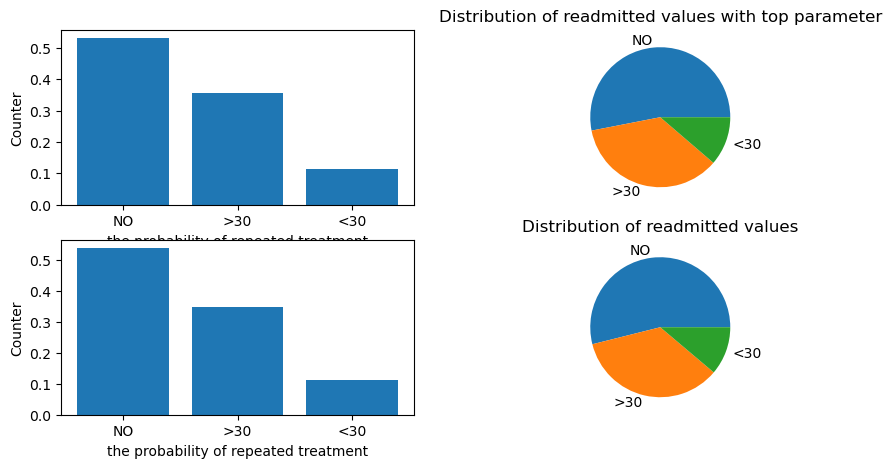

0

In [141]:
def top_count(i, data, atr,top, Count_top):
    print('atr[i] = ', atr[i], 'top[i] = ', top[i])
    temp = data[data[atr[i]] == top[i]]
    temp = temp[[atr[3], 'readmitted']]
    temp.head(110000)
    Count_top = Count_top.transpose()
    print(Count_top[atr[i]])
    print()
    %matplotlib inline    
    fig = plt.figure()
    fig.set_size_inches(10,5)
    temp_uniq = temp['readmitted'].unique()
    temp_count = temp.value_counts(['readmitted'], normalize = True)

    rm_count = data.value_counts(['readmitted'], normalize = True)
    print(temp_count)
    print(rm_count)
    temp_count = temp_count.tolist()

    fig.add_subplot(2, 2, 1)  
    plt.bar(temp_uniq, temp_count)
    plt.ylabel("Counter")
    plt.xlabel("the probability of repeated treatment")
    fig.add_subplot(2, 2, 2) 
    plt.pie(temp_count, labels = temp_uniq)
    plt.title('Distribution of readmitted values ​​with top parameter')
    
    fig.add_subplot(2, 2, 3)  
    plt.bar(rm_uniq, rm_count)
    plt.ylabel("Counter")
    plt.xlabel("the probability of repeated treatment")
    fig.add_subplot(2, 2, 4) 
    plt.pie(rm_count, labels = rm_uniq)
    plt.title('Distribution of readmitted values')
    if len(temp_count) != 0:
        print('Relative error:')
        count_top_rm = abs(rm_count-temp_count)/rm_count*100
        print(count_top_rm)
    plt.show()
    return 0
top_count(2, data, atr, top, Count_top)

Which indicates that the distribution of the readmitted attribute values ​​with the race attribute value = "Caucasian" is close to the distribution across the entire data set.

To check, let's see what the function can produce for a non-categorical feature - nothing.

atr[i] =  encounter_id top[i] =  2278392.0
Count_top     0.000983
count         101766.0
freq               1.0
top          2278392.0
Name: encounter_id, dtype: object

readmitted
NO            1.0
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             85.487752
>30           186.301871
<30           796.064101
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


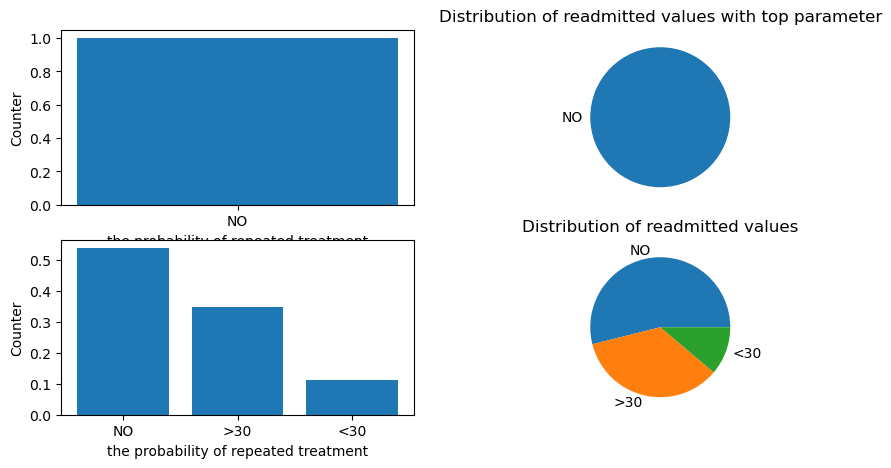

0

In [143]:
top_count(0, data, atr, top, Count_top)

And we will do this in a loop for all attributes

/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


object
atr[i] =  race top[i] =  Caucasian
Count_top    76.486788
count            99493
freq             76099
top          Caucasian
Name: race, dtype: object

readmitted
NO            0.530664
>30           0.356430
<30           0.112906
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            1.568327
>30           2.046702
<30           1.170617
Name: proportion, dtype: float64


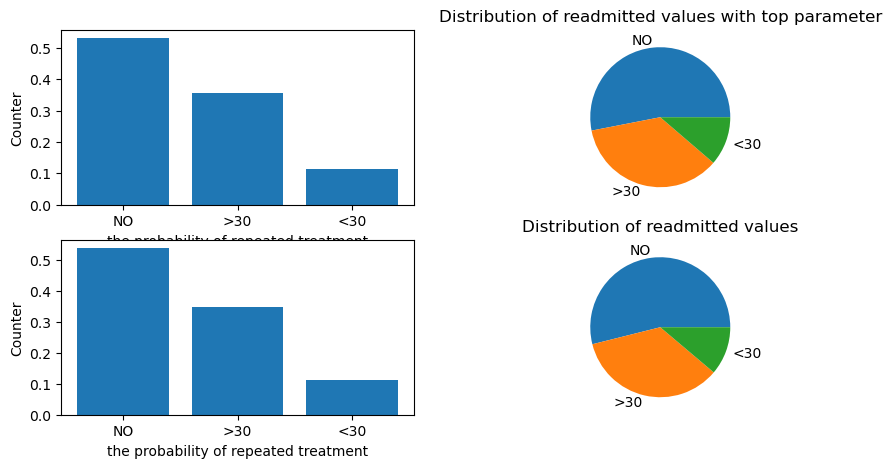

object
atr[i] =  gender top[i] =  Female


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Count_top    53.760208
count           101763
freq             54708
top             Female
Name: gender, dtype: object

readmitted
NO            0.530782
>30           0.356767
<30           0.112452
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            1.546514
>30           2.143012
<30           0.763807
Name: proportion, dtype: float64


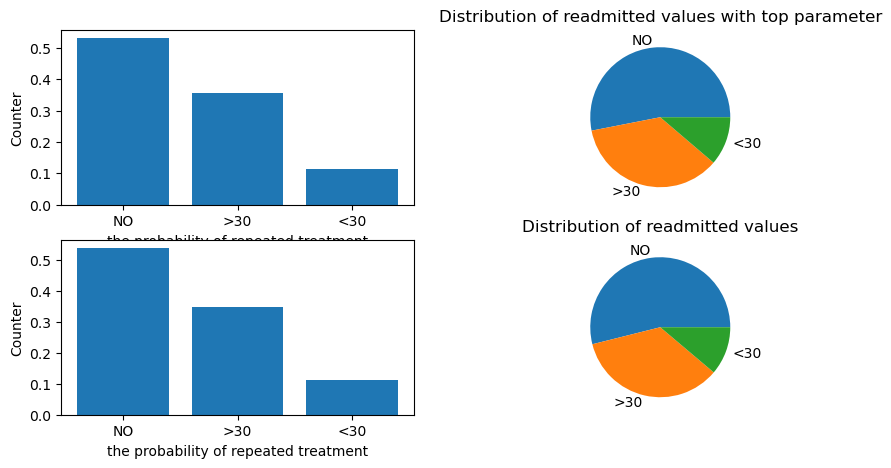

object
atr[i] =  age top[i] =  [70-80)
Count_top    25.615628
count           101766
freq             26068
top            [70-80)
Name: age, dtype: object

readmitted
NO            0.518797
>30           0.363472
<30           0.117731
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            3.769512
>30           4.062844
<30           5.494120
Name: proportion, dtype: float64


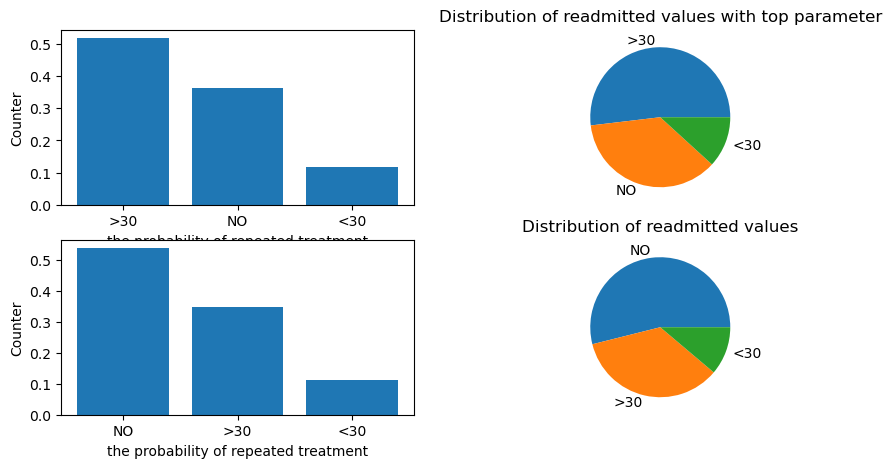

object
atr[i] =  weight top[i] =  [75-100)
Count_top    41.789177
count             3197
freq              1336
top           [75-100)
Name: weight, dtype: object

readmitted
>30           0.496257
NO            0.389222
<30           0.114521
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             7.950315
>30           11.434860
<30            2.618119
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


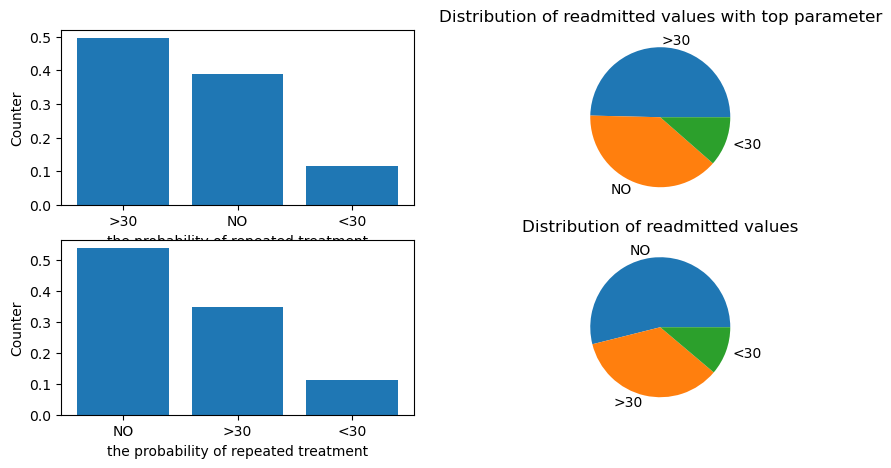

object
atr[i] =  admission_type_id top[i] =  1.0
Count_top    53.053083
count         101766.0
freq           53990.0
top                1.0
Name: admission_type_id, dtype: object

readmitted
NO            0.527135
>30           0.357640
<30           0.115225
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            2.222978
>30           2.393088
<30           3.249023
Name: proportion, dtype: float64


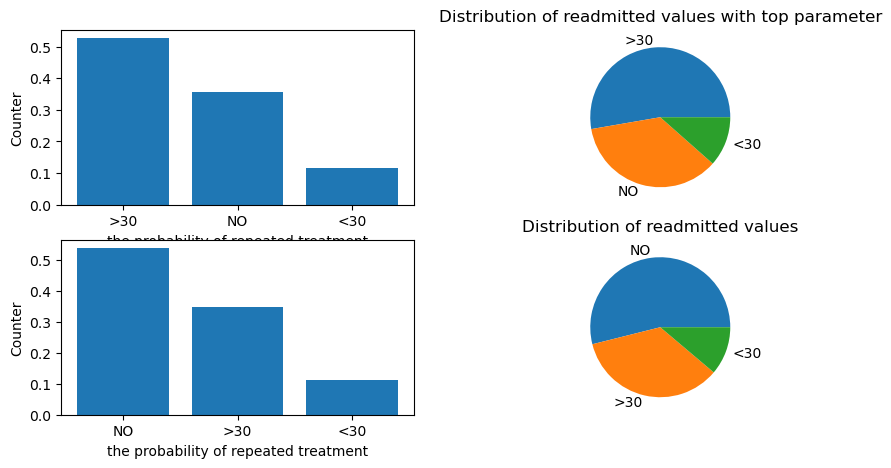

object
atr[i] =  discharge_disposition_id top[i] =  1.0
Count_top    59.188727
count         101766.0
freq           60234.0
top                1.0
Name: discharge_disposition_id, dtype: object

readmitted
NO            0.549773
>30           0.357223
<30           0.093004
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             1.976075
>30            2.273755
<30           16.662498
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


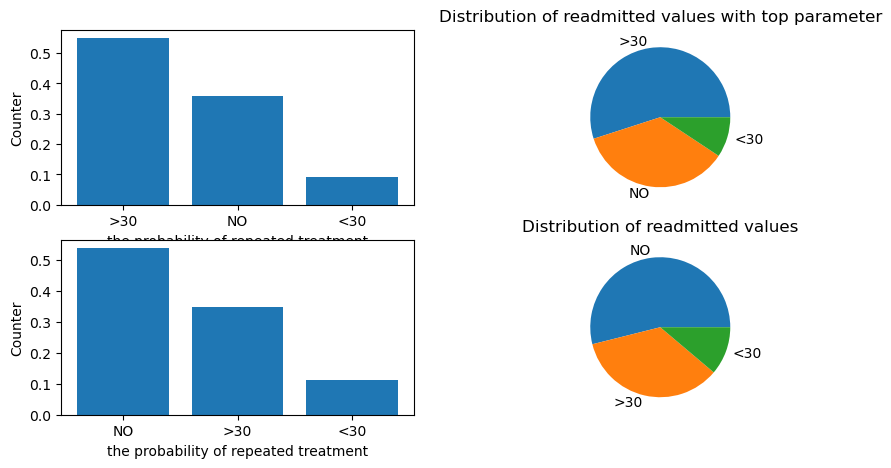

object
atr[i] =  admission_source_id top[i] =  7.0
Count_top    56.496276
count         101766.0
freq           57494.0
top                7.0
Name: admission_source_id, dtype: object



/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


readmitted
NO            0.506262
>30           0.376857
<30           0.116882
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            6.094688
>30           7.894783
<30           4.733551
Name: proportion, dtype: float64


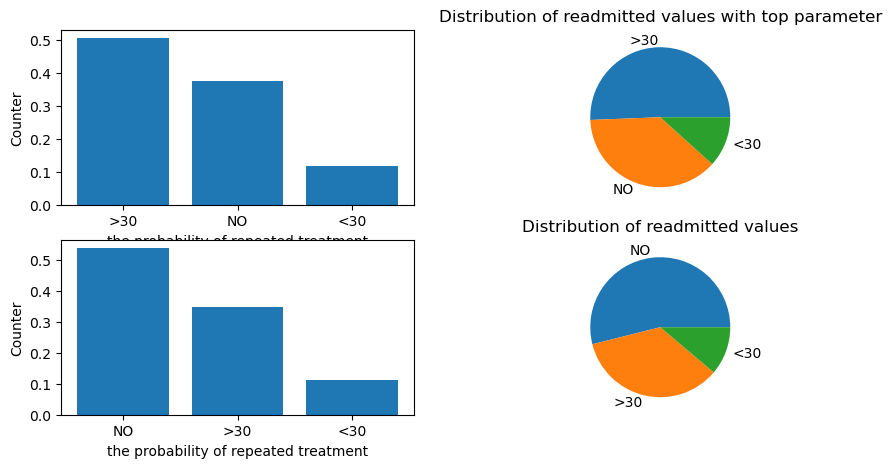

int64
object
atr[i] =  payer_code top[i] =  MC
Count_top    52.737766
count            61510
freq             32439
top                 MC
Name: payer_code, dtype: object

readmitted
NO            0.513179
>30           0.369370
<30           0.117451
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            4.811659
>30           5.751380
<30           5.243818
Name: proportion, dtype: float64


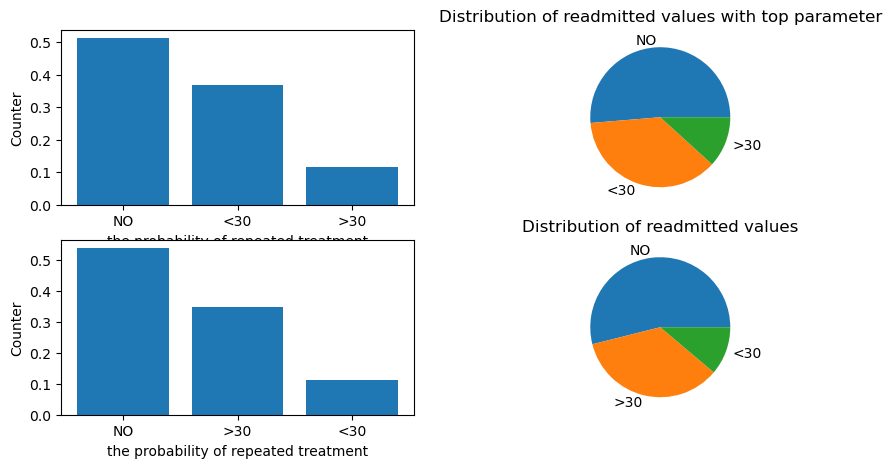

object
atr[i] =  medical_specialty top[i] =  InternalMedicine
Count_top           28.243627
count                   51817
freq                    14635
top          InternalMedicine
Name: medical_specialty, dtype: object

readmitted
NO            0.56481
>30           0.32272
<30           0.11247
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            4.765409
>30           7.604801
<30           0.780424
Name: proportion, dtype: float64


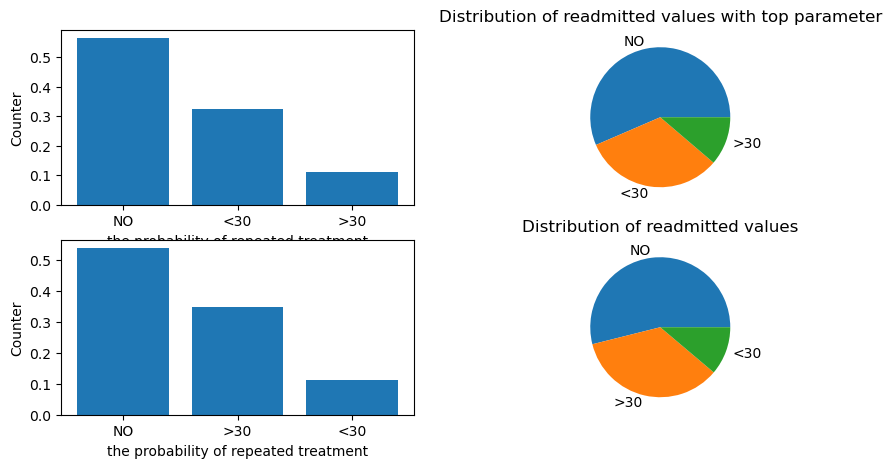

int64
int64
int64
int64
int64
int64
object
atr[i] =  diag_1 top[i] =  428
Count_top    6.744312
count          101745
freq             6862
top               428
Name: diag_1, dtype: object

readmitted
>30           0.450160
NO            0.408773
<30           0.141067
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            16.500778
>30           17.032461
<30           26.404846
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


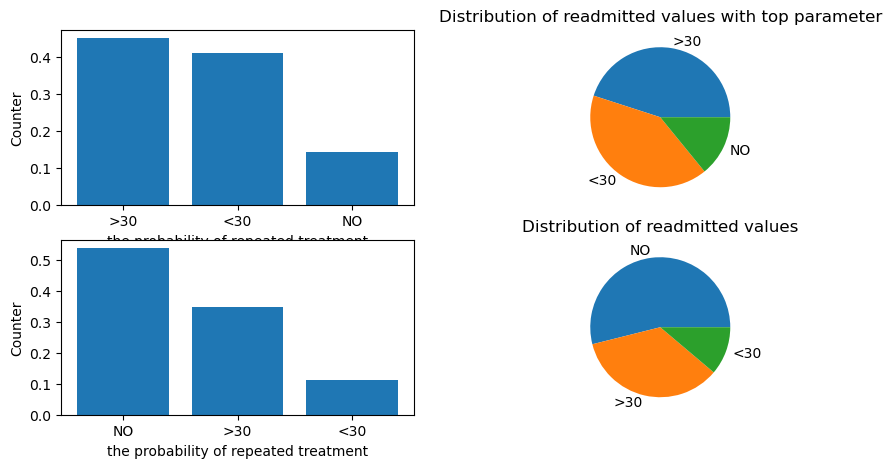

object
atr[i] =  diag_2 top[i] =  276
Count_top    6.658252
count          101408
freq             6752
top               276
Name: diag_2, dtype: object

readmitted
NO            0.525770
>30           0.354265
<30           0.119964
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            2.476079
>30           1.426848
<30           7.495842
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


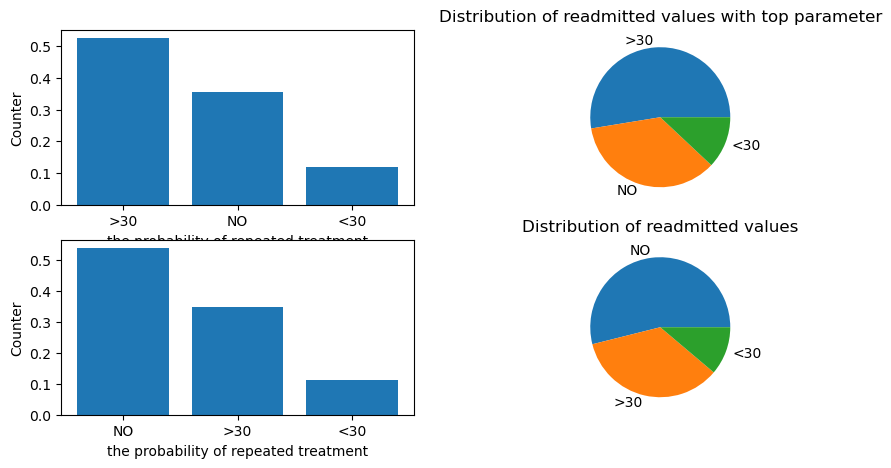

object
atr[i] =  diag_3 top[i] =  250
Count_top    11.515502
count           100343
freq             11555
top                250
Name: diag_3, dtype: object

readmitted
NO            0.606231
>30           0.308611
<30           0.085158
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            12.448438
>30           11.644096
<30           23.693027
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


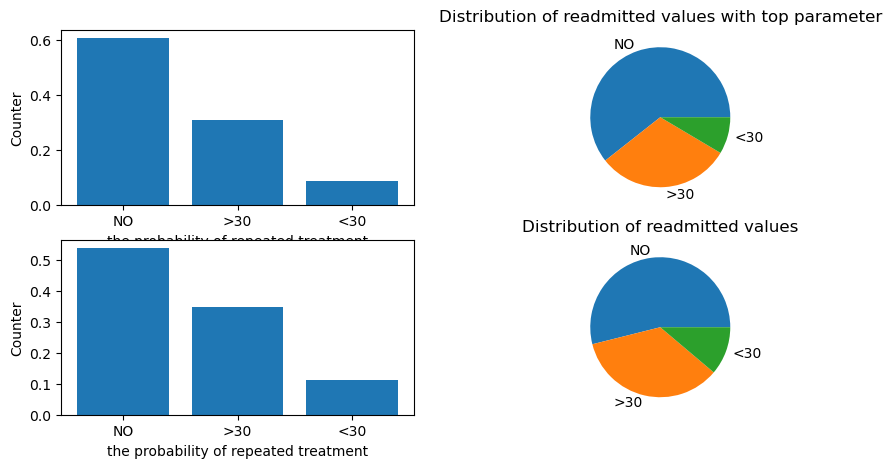

int64
object
atr[i] =  max_glu_serum top[i] =  Norm
Count_top    48.578376
count             5346
freq              2597
top               Norm
Name: max_glu_serum, dtype: object

readmitted
NO            0.545630
>30           0.340778
<30           0.113593
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            1.207603
>30           2.434672
<30           1.786257
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


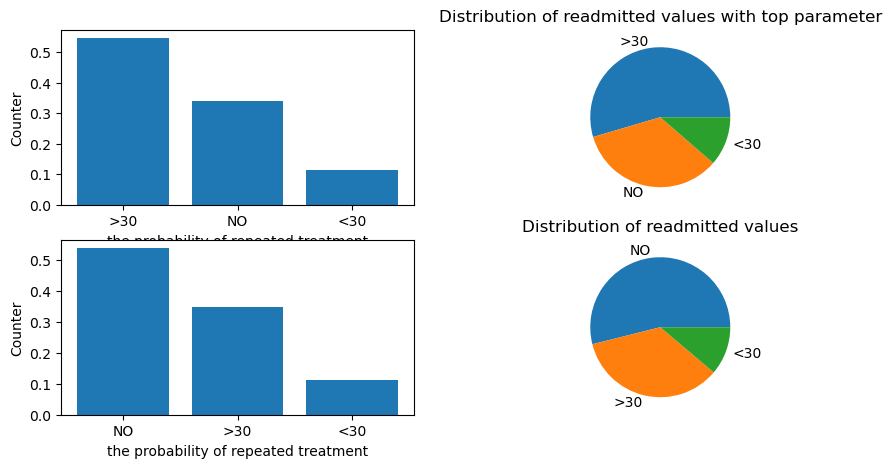

object
atr[i] =  A1Cresult top[i] =  >8
Count_top    48.278294
count            17018
freq              8216
top                 >8
Name: A1Cresult, dtype: object

readmitted
NO            0.548199
>30           0.353092
<30           0.098710
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO             1.684133
>30            1.090765
<30           11.549661
Name: proportion, dtype: float64


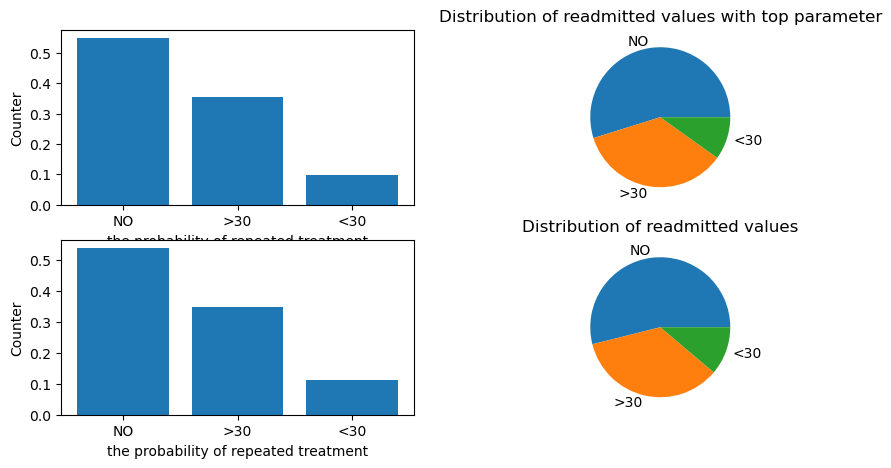

object
atr[i] =  metformin top[i] =  Steady
Count_top    91.785071
count            19988
freq             18346
top             Steady
Name: metformin, dtype: object

readmitted
NO            0.566609
>30           0.336259
<30           0.097133
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             5.098941
>30            3.728538
<30           12.962704
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


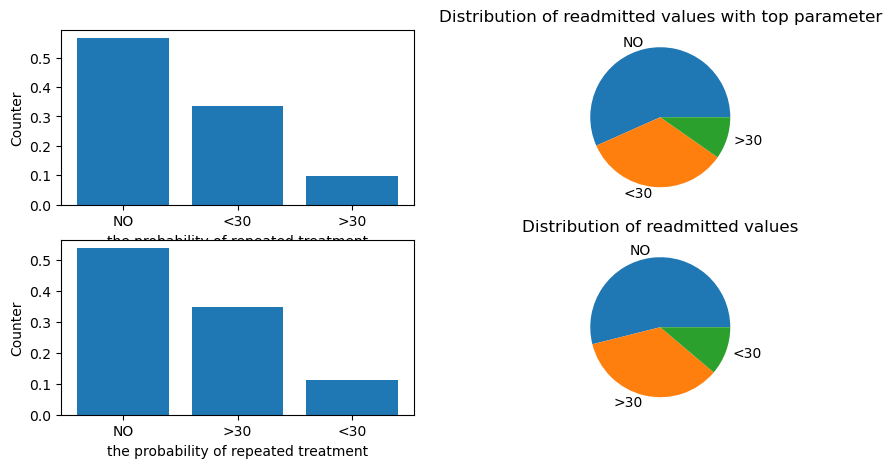

object
atr[i] =  repaglinide top[i] =  Steady
Count_top    89.928525
count             1539
freq              1384
top             Steady
Name: repaglinide, dtype: object

readmitted
NO            0.443642
>30           0.424855
<30           0.131503
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            17.709914
>30           21.636922
<30           17.835019
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


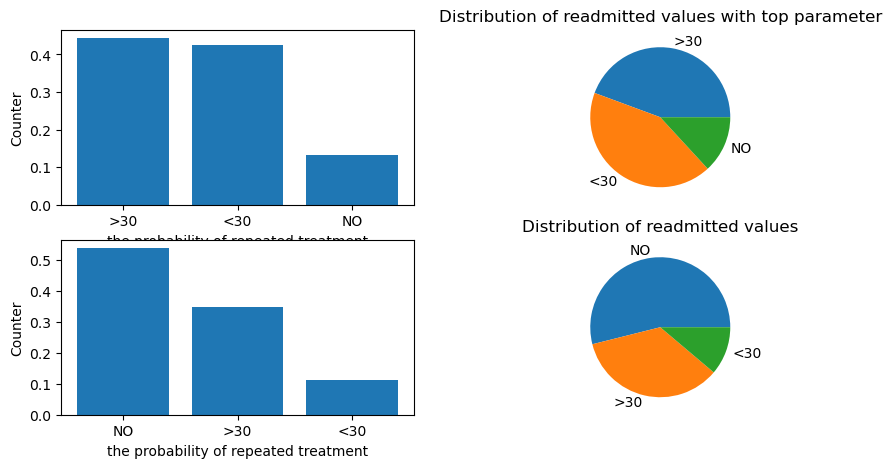

object
atr[i] =  nateglinide top[i] =  Steady
Count_top    95.021337
count              703
freq               668
top             Steady
Name: nateglinide, dtype: object

readmitted
NO            0.511976
>30           0.371257
<30           0.116766
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            5.034714
>30           6.291713
<30           4.630239
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


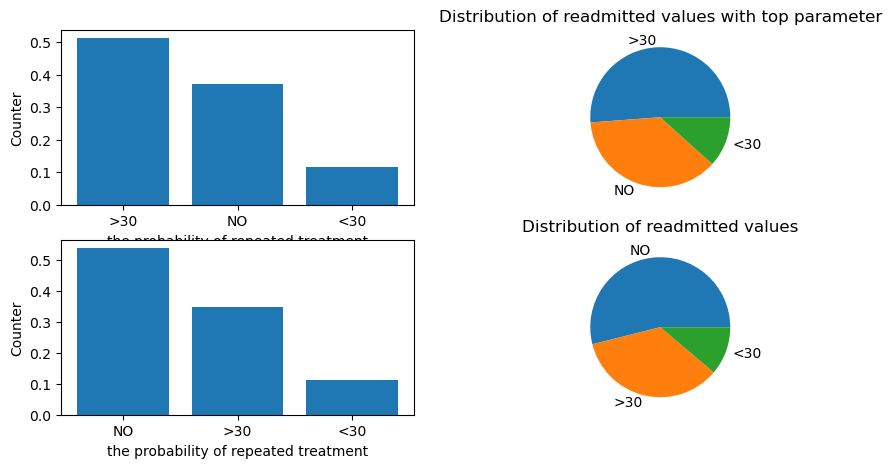

object
atr[i] =  chlorpropamide top[i] =  Steady
Count_top    91.860465
count               86
freq                79
top             Steady
Name: chlorpropamide, dtype: object

readmitted
NO            0.569620
>30           0.367089
<30           0.063291
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             5.657580
>30            5.098155
<30           43.287082
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


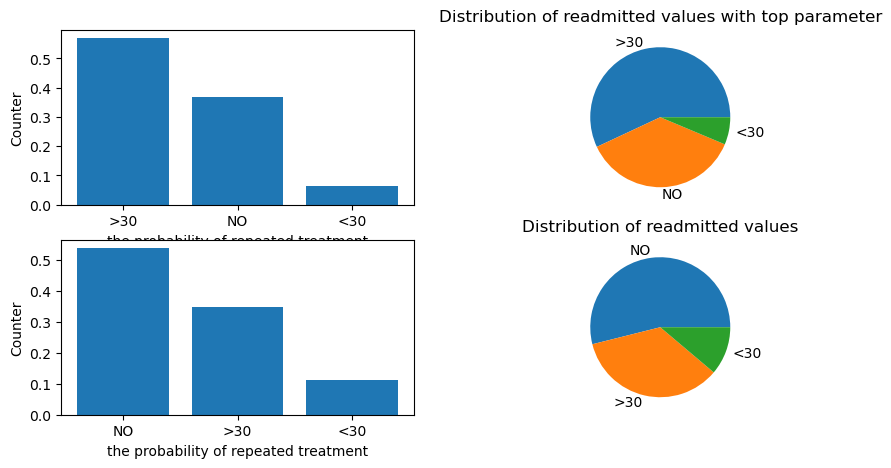

object
atr[i] =  glimepiride top[i] =  Steady
Count_top    89.963398
count             5191
freq              4670
top             Steady
Name: glimepiride, dtype: object

readmitted
NO            0.527837
>30           0.371949
<30           0.100214
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             2.092654
>30            6.489582
<30           10.201713
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


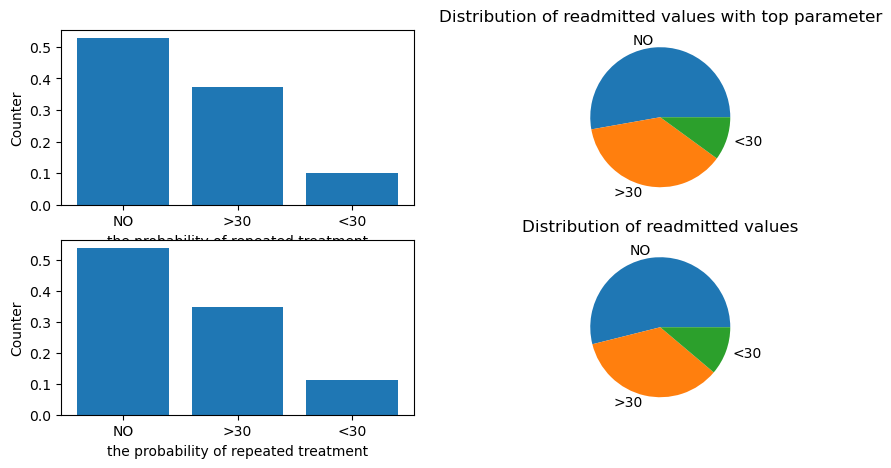

object
atr[i] =  acetohexamide top[i] =  Steady
Count_top     100.0
count             1
freq              1
top          Steady
Name: acetohexamide, dtype: object

readmitted
>30           1.0
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             85.487752
>30           186.301871
<30           796.064101
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


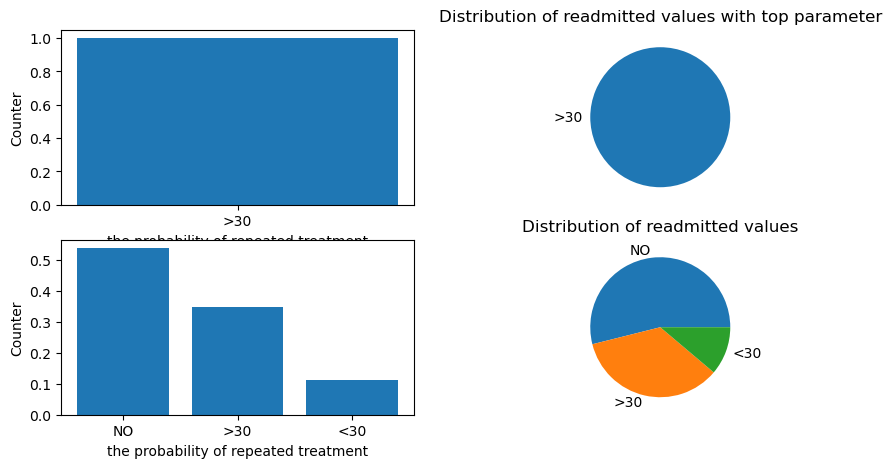

object
atr[i] =  glipizide top[i] =  Steady
Count_top    89.516002
count            12686
freq             11356
top             Steady
Name: glipizide, dtype: object

readmitted
NO            0.515586
>30           0.372754
<30           0.111659
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            4.365024
>30           6.720308
<30           0.053653
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


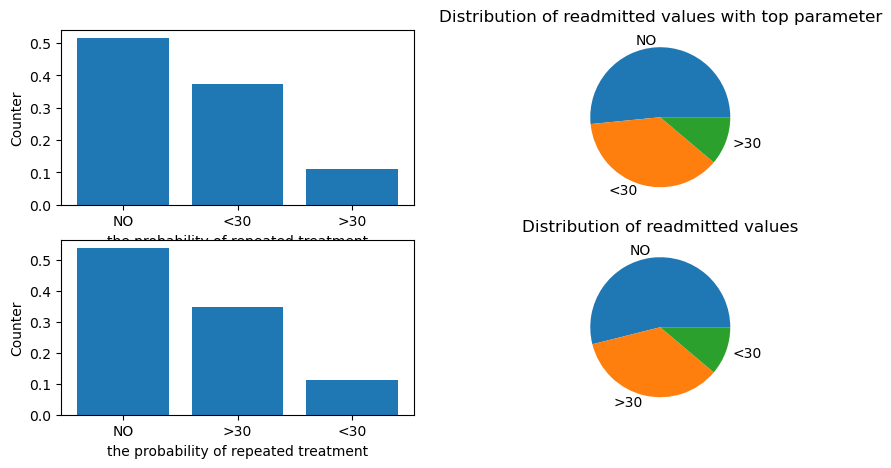

object
atr[i] =  glyburide top[i] =  Steady
Count_top    87.079812
count            10650
freq              9274
top             Steady
Name: glyburide, dtype: object

readmitted
NO            0.545396
>30           0.347315
<30           0.107289
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            1.164228
>30           0.563044
<30           3.862003
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


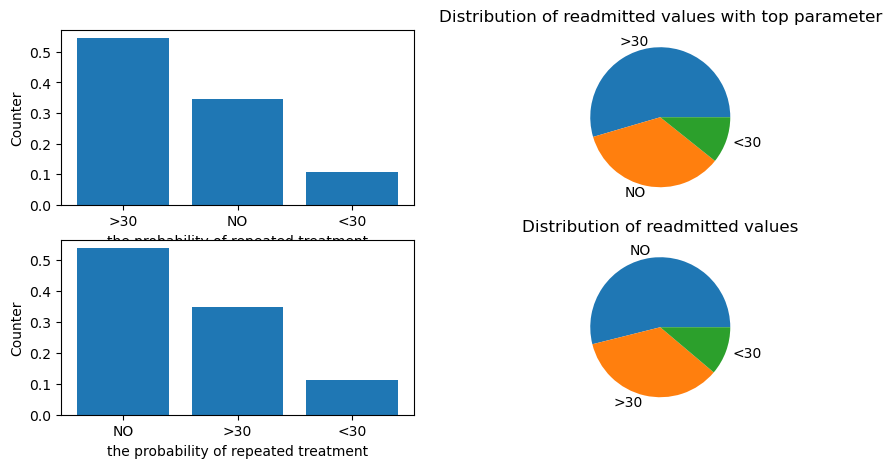

object
atr[i] =  tolbutamide top[i] =  Steady
Count_top     100.0
count            23
freq             23
top          Steady
Name: tolbutamide, dtype: object

readmitted
NO            0.652174
>30           0.304348
<30           0.043478
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            20.970273
>30           12.864648
<30           61.040691
Name: proportion, dtype: float64


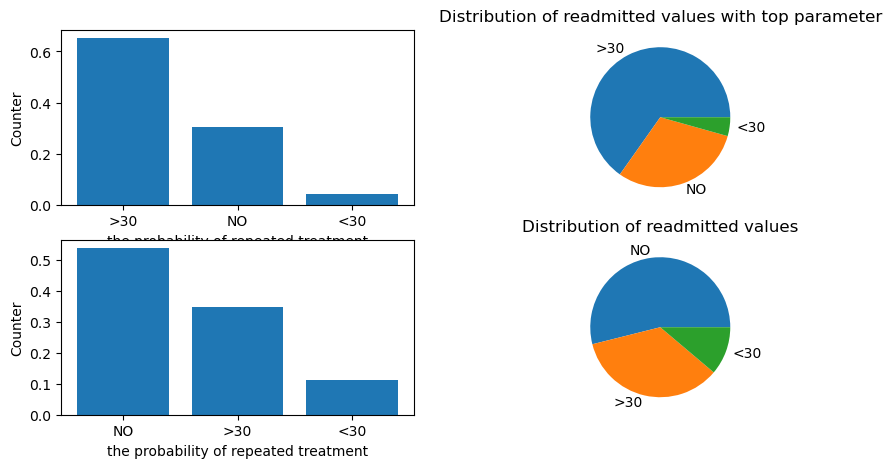

object
atr[i] =  pioglitazone top[i] =  Steady
Count_top    95.196507
count             7328
freq              6976
top             Steady
Name: pioglitazone, dtype: object

readmitted
NO            0.520212
>30           0.375573
<30           0.104214
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO            3.507017
>30           7.527365
<30           6.617173
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


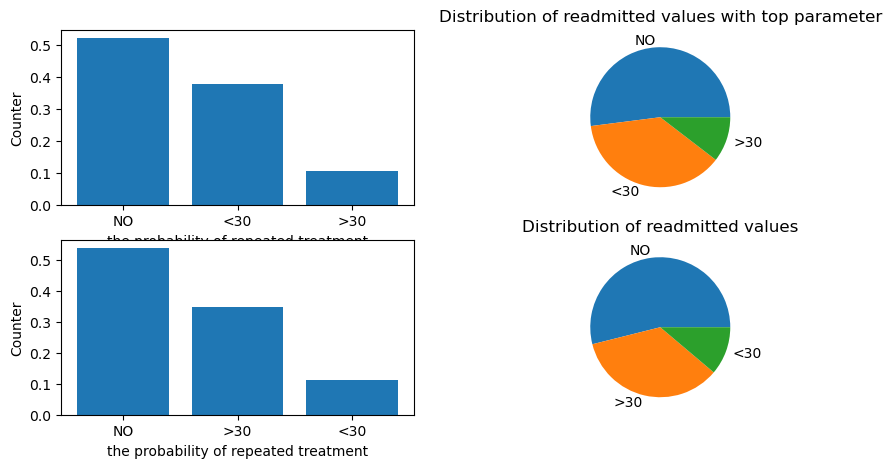

object
atr[i] =  rosiglitazone top[i] =  Steady
Count_top    95.836606
count             6365
freq              6100
top             Steady
Name: rosiglitazone, dtype: object

readmitted
NO            0.512131
>30           0.382787
<30           0.105082
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


Relative error:
readmitted
NO            5.005945
>30           9.592601
<30           5.839821
Name: proportion, dtype: float64


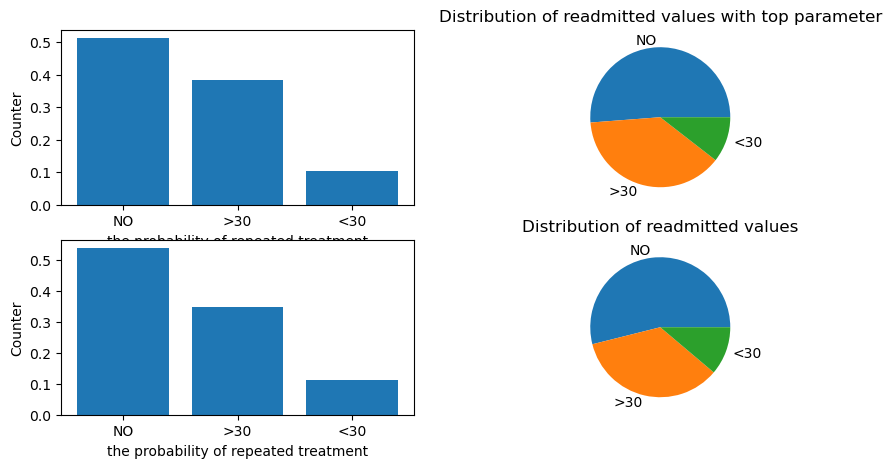

object
atr[i] =  acarbose top[i] =  Steady
Count_top    95.779221
count              308
freq               295
top             Steady
Name: acarbose, dtype: object

readmitted
>30           0.508475
NO            0.406780
<30           0.084746
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             5.684194
>30           16.461778
<30           24.062364
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


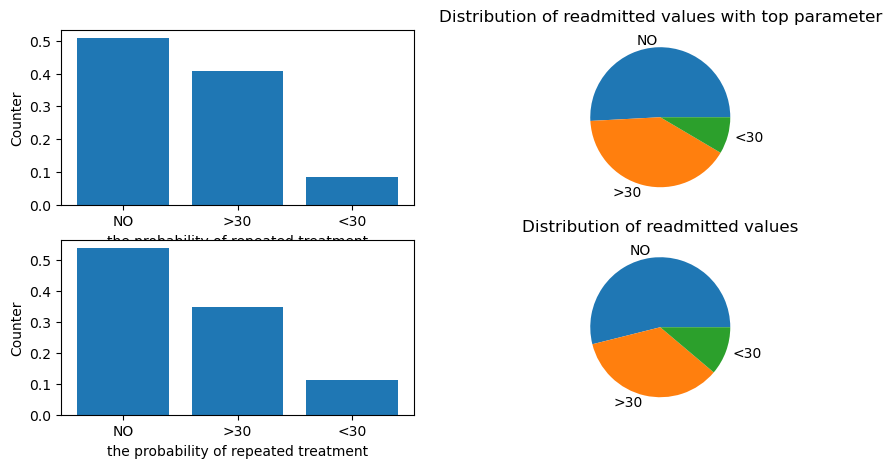

object
atr[i] =  miglitol top[i] =  Steady
Count_top    81.578947
count               38
freq                31
top             Steady
Name: miglitol, dtype: object

readmitted
>30           0.516129
NO            0.419355
<30           0.064516
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:
readmitted
NO             4.264386
>30           20.062075
<30           42.189413
Name: proportion, dtype: float64


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


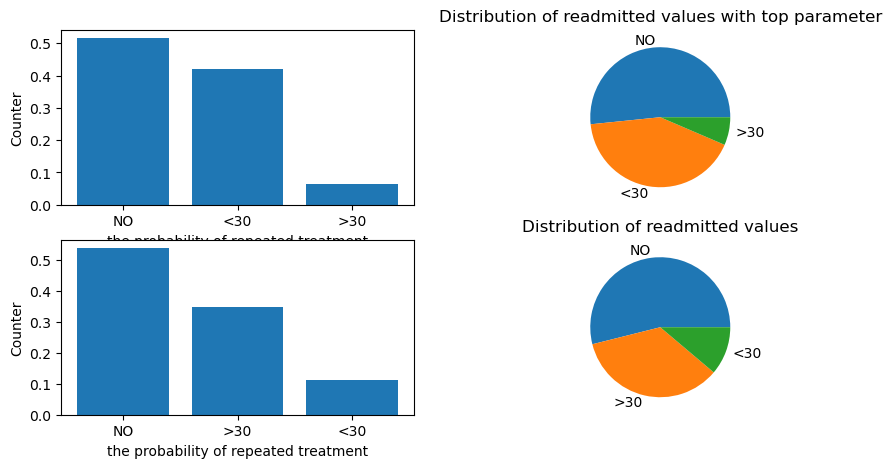

object
atr[i] =  troglitazone top[i] =  Steady
Count_top     100.0
count             3
freq              3
top          Steady
Name: troglitazone, dtype: object

readmitted
>30           0.666667
NO            0.333333
Name: proportion, dtype: float64
readmitted
NO            0.539119
>30           0.349282
<30           0.111599
Name: proportion, dtype: float64
Relative error:


/tmp/ipykernel_12569/1345025649.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('atr[i] = ', atr[i], 'top[i] = ', top[i])
/tmp/ipykernel_12569/1345025649.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp = data[data[atr[i]] == top[i]]


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

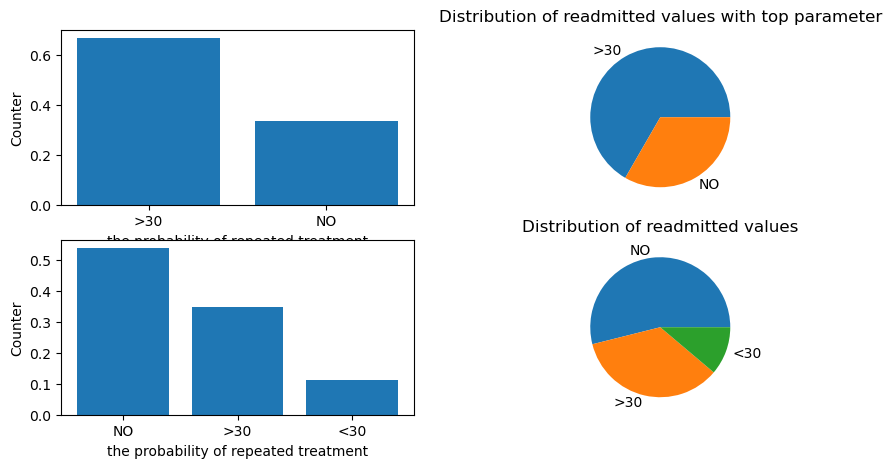

In [145]:
for i in range (2, len(atr)):
    print(data[atr[i]].dtype)
    if ((data[atr[i]].dtype == 'object') & (atr[i] != 'readmitted')):
        top_count(i, data, atr, top, Count_top)

## Conclusion: What we got:
- The attributes encounter_id and patient_nbr are unique, as expected. The readmitted variable does not depend on them.

- The race variable has a similar distribution of readmitted values ​​to the general dataset. The relative error of the distribution does not exceed 2.1% of the total data.
- Note: Attributes with popular values, the error of which is less than 10% or filled more than 50%, will not be considered further.

- The weight attribute with a popular value of 75-100 has an insignificant error from the general distribution.

- The attributes "diagnosis 1 and additional" have a significant discrepancy with the general distribution of the readmitted indicator. Diagnosis 2, repeated, on the contrary, more accurately corresponds to the general distribution.

- The max_glu_serum and A1Cresult attributes have a high percentage of filling (~48%), but are only partially filled.

- The examide and citoglipton attributes are 100% filled with the same value "No". Therefore, it makes no sense to use them in data analysis.

- The readmitted attribute does not require comparison with itself.

## 8. Взять несколько потенциально влияющих на переменную readmitted значений и вывести численное распределение по набору данных уникальных значений каждого атрибута. Построить круговые диаграммы для каждого атрибута. Сделать выводы о влиянии атрибутов.

Первым делом выпишем полный список атрибутов, указав у каждого атрибута его особенности, которые уже определили.

In [156]:
Count_top.head(100)

,Count_top,count,freq,top
encounter_id,0.000983,101766.0,1.0,2278392.0
patient_nbr,0.039306,101766.0,40.0,88785891.0
race,76.486788,99493,76099,Caucasian
gender,53.760208,101763,54708,Female
age,25.615628,101766,26068,[70-80)
weight,41.789177,3197,1336,[75-100)
admission_type_id,53.053083,101766.0,53990.0,1.0
discharge_disposition_id,59.188727,101766.0,60234.0,1.0
admission_source_id,56.496276,101766.0,57494.0,7.0
time_in_hospital,NaN,101766.0,NaN,NaN


## Атрибуты зависят от контекста и задачи, которую необходимо решить. В нашем случае, задача заключается в прогнозировании повторной госпитализации пациента. Рассмотрим значимость атрибутов с учетом этой задачи:

    Уникальность:

        Атрибуты encounter_id и patient_nbr уникальны и позволяют идентифицировать каждую запись. Однако, как мы выяснили, переменная readmitted от них не зависит.

    Релевантность:

        Атрибуты, связанные с медицинским состоянием пациента: Например, race, weight, диагнозы (diag_1, diag_2, diag_3), результаты анализов (max_glu_serum, A1Cresult). Эти атрибуты отражают информацию, необходимую для прогнозирования повторной госпитализации.

    Корреляция:

        Атрибуты, связанные с предыдущими госпитализациями: Например, количество предыдущих госпитализаций, длительность пребывания в больнице. Эти атрибуты могут помочь в прогнозировании повторной госпитализации.

    Отсутствие пропусков:

        Атрибуты с минимальным количеством пропущенных значений: Например, race, diag_1, diag_2, diag_3. Это обеспечит полноту данных и правильность анализа.

    Масштабируемость:

        Атрибуты, которые легко масштабируются по размеру или частоте обновления: Например, данные о лекарствах, которые пациент принимал (metformin, insulin и т.д.). Эти атрибуты могут быть значимыми для оценки эффективности лечения.

    Контекстуальная значимость:

        Атрибуты, отражающие важные характеристики пациента: Например, возраст, пол, наличие хронических заболеваний. Эти атрибуты могут помочь в понимании риска повторной госпитализации.

    Информационная ценность:

        Атрибуты, содержащие уникальную информацию: Например, результаты лабораторных анализов, данные о проведенных процедурах. Эти атрибуты могут способствовать пониманию данных и прогнозированию повторной госпитализации.

       Важно отметить, что значимость атрибутов может меняться в зависимости от используемых методов анализа данных. В нашем случае, для решения задачи прогнозирования повторной госпитализации, наиболее значимыми атрибутами будут те, которые отражают медицинское состояние пациента, его предыдущие госпитализации и результаты анализов.

### Summary: Attributes Used to Determine Readmission

The following attributes may be used to determine patient readmission:

Medical Diagnosis History:

Previous Diagnoses and Treatments: For example, diag_1, diag_2, diag_3 attributes, which reflect the patient's primary and secondary diagnoses. Previous diagnoses and treatments may be predictors for future hospitalization.

Research Conclusions:

Laboratory Test or Medical Investigation Results: For example, max_glu_serum, A1Cresult attributes, which reflect the results of lab tests. These results may indicate the presence of conditions that may lead to readmission.

Patient Characteristics:

Factors such as age, gender, family history, presence of comorbid conditions or previously identified risk factors: For example, age, gender, race attributes. These factors may affect the likelihood of readmission.

Medical Procedures and Prescriptions:

Prescribed medical procedures, prescriptions, or recommendations: For example, attributes related to taking medications (metformin, insulin, etc.). These procedures and prescriptions may indicate the likelihood of readmission.

Healthcare System Factors:

Healthcare system attributes such as access to care, structure of care delivery, or level of healthcare quality: For example, attributes reflecting hospital location or access to healthcare services.

Social and Economic Status:

Factors such as education level, income, family support, and access to social services: For example, attributes reflecting the patient's socioeconomic status.

Treatment Compliance:

Failure to adhere to prescribed treatment or non-adherence to medical recommendations: For example, attributes reflecting frequency of doctor visits or adherence to treatment regimens.

##### For various purposes, all of these attributes can be used individually or in combination to create readmission prediction models and help make decisions to prevent readmissions.

* race - раса пациента
* gender - пол пациента
* age - возраст пациента
* weight - вес пациента
* admission_* type_id - тип приема пациента в больницу
* discharge_disposition_id - тип выписки пациента из больницы
* admission_source_id - источник поступления пациента в больницу
* time_in_hospital - количество дней, проведенных пациентом в больнице
* payer_code - код платежеспособного лица
* medical_specialty - специальность врача-специалиста
* num_lab_procedures - количество лабораторных процедур, проведенных у пациента
* num_procedures - количество процедур, проведенных у пациента
* num_medications - количество принимаемых пациентом медикаментов
* number_outpatient - количество визитов пациента к врачу в поликлинике без госпитализации
* number_emergency - количество экстренных визитов пациента в больницу
* number_inpatient - количество госпитализаций пациента в больницу
* diag_1, diag_2, diag_3 - коды диагнозов пациента
* number_diagnoses - количество поставленных диагнозов пациенту
* max_glu_serum - максимальный уровень глюкозы в крови пациента
* A1Cresult - результат теста на уровень A1C у пациента
* metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone - информация о применяемых медикаментах пациентом
* change - наличие изменений в лечении пациента
* diabetesMed - факт получения пациентом лечения от диабета
* readmitted - информация о повторном госпитализации пациента


Эти атрибуты содержат информацию о пациенте, его лечении, состоянии здоровья и фактах госпитализации, которые могут использоваться в качестве выходных параметров для анализа и принятия решений.

0. Exclude
1. Exclude if it cannot be replaced
2. Transform.
3. Use.

* "encounter_id", - just an identifier, not needed for analysis, full set, 0
* "patient_nbr", - just an identifier, not needed for analysis, full set, 0
* "race", - important attribute, almost full set, 3
* "gender", - important attribute, full set, 3
* "age", - important attribute, full set, 3
* "weight", - important attribute, but critically incomplete set. Cannot be used directly, 1
* "admission_type_id", - reason for admission, full set, 0
* "discharge_disposition_id", - reason for discharge. This attribute has values ​​that exclude a repeat appointment,2
* "admission_source_id", - admission source,0
* "time_in_hospital", - time in hospital, important parameter, full set (convert taking into account the quantity: "num_lab_procedures", "num_procedures", "num_medications", "number_outpatient", "number_emergency", "number_inpatient" ),2
* "payer_code", - payment type, we believe that it does not affect treatment,0
* "medical_specialty", - medical. doctor's specialty,0
* "num_lab_procedures", - number of tests performed,2
* "num_procedures", - number of treatment procedures performed,2
* "num_medications", - number of medications received,2
* "number_outpatient", - number of outpatient visits to the hospital per year,2
* "number_emergency", - number of calls to the emergency room per year,2
* "number_inpatient", - number of visits to the hospital per year,2
* "diag_1", - primary diagnosis,3
* "diag_2", - secondary diagnosis,3
* "diag_3", - repeated (additional) diagnosis,3
* "number_diagnoses", - number of diagnoses in the system,3
* "max_glu_serum", - glucose result (primary sign of diabetes),1
* "A1Cresult", - primary diabetic test,1
* "metformin", - All (Convert to reflect 23 types of medication),2
* "repaglinide", -,2
* "nateglinide", -,2
* "chlorpropamide", -,2
* "glimepiride", -,2
* "acetohexamide", -,2
* "glipizide", -,2
* "glyburide", -,2
* "tolbutamide", -,2
* "pioglitazone", -,2
* "rosiglitazone", -,2
* "acarbose", -,2
* "miglitol", -,2
* "troglitazone", -,2
* "tolazamide", -,2
* "examide", -,2
* "citoglipton", - no one has done it, exclude,0
* "insulin", - no one has done it, exclude,0
* "glyburide-metformin", -,2
* "glipizide-metformin", -,2
* "glimepiride-pioglitazone", -,2
* "metformin-rosiglitazone", -,2
* "metformin-pioglitazone", -,2
* "change", - change in treatment plan,3.
* "diabetesMed", - medication plan,3
* "readmitted", - readmitted. Output attribute,3

Let's make separate lists based on our distribution:

In [164]:
#medications
print('Data on medications that need to be transformed, ', len(medications))

data2_hospital_time = ['discharge_disposition_id', 'time_in_hospital', 
                      'num_lab_procedures', 'num_procedures','num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient']
print('Data on hospitalization that needs to be transformed, ', len(data2_hospital_time))

data1 = ['max_glu_serum', 'A1Cresult', 'weight']
print('Data to be excluded if replacement is not possible ', len(data1))
data0 = ['payer_code', 'medical_specialty',
         'encounter_id', 'patient_nbr', 'admission_type_id', 
         'admission_source_id' ]
print('Data to be excluded, ', len(data0))


selected = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 
         'number_diagnoses', 'change', 'diabetesMed']
print('Data to be used for sure, ', len(selected))

Data on medications that need to be transformed,  23
Data on hospitalization that needs to be transformed,  8
Data to be excluded if replacement is not possible  3
Data to be excluded,  6
Data to be used for sure,  9



race distribution:
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

gender distribution:
gender
Female    54708
Male      47055
Name: count, dtype: int64

age distribution:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

admission_type_id distribution:
admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

time_in_hospital distribution:
time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64


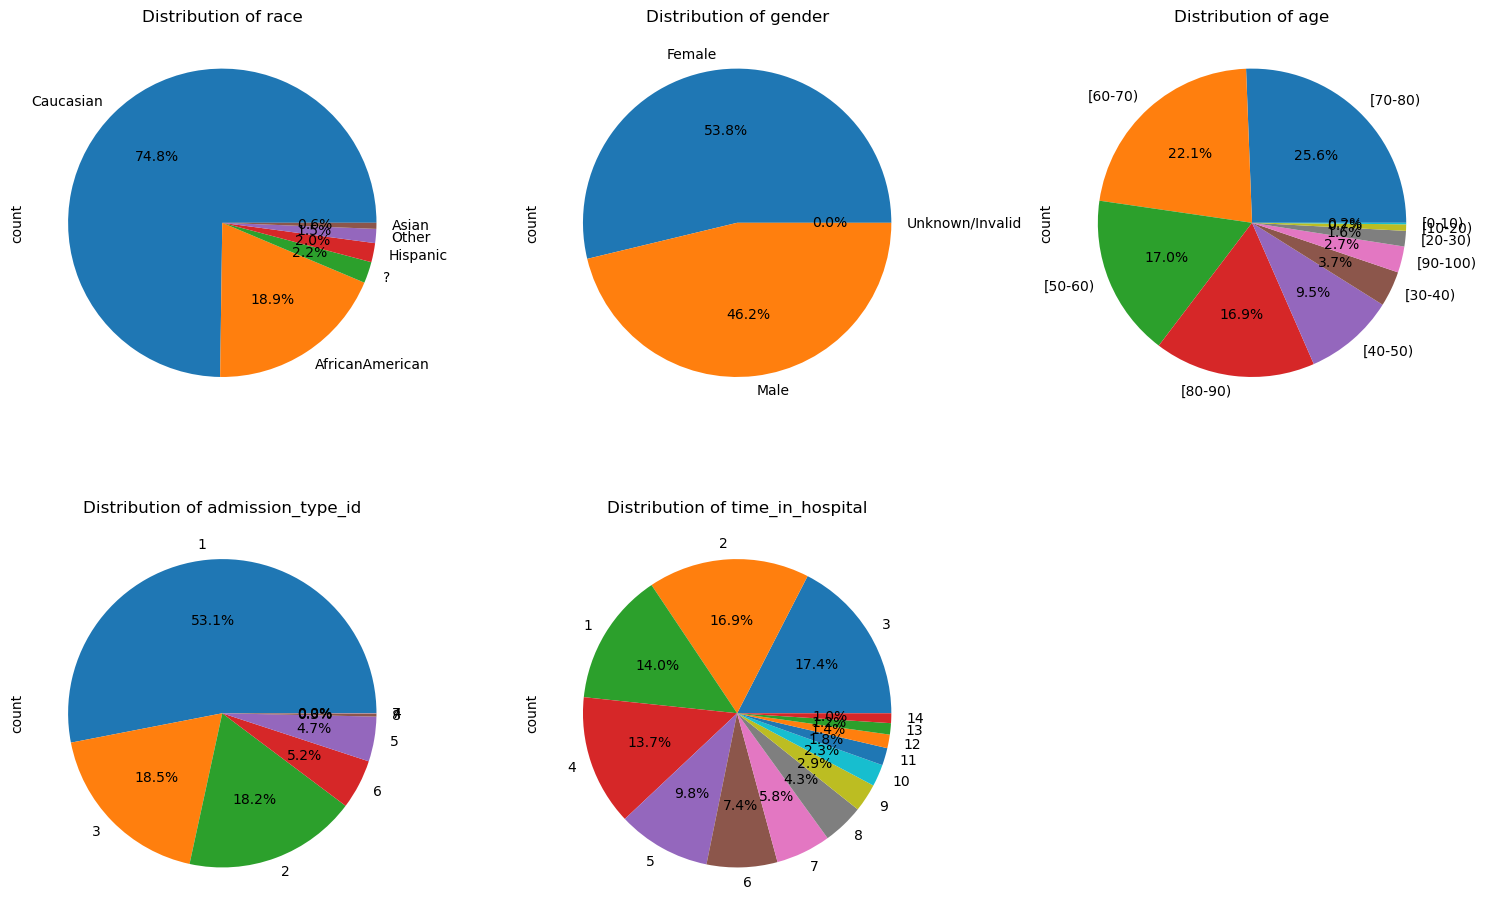

In [166]:
# Selecting attributes
selected_attributes = ['race', 'gender', 'age', 'admission_type_id', 'time_in_hospital']

# Displaying numerical distribution for unique values of each attribute
for attribute in selected_attributes:
    print(f"\n{attribute} distribution:")
    print(data[attribute].value_counts())

# Plotting pie charts
plt.figure(figsize=(15, 10))
for i, attribute in enumerate(selected_attributes, 1):
    plt.subplot(2, 3, i)
    df[attribute].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Distribution of {attribute}')

plt.tight_layout()
plt.show()

Now learn how to output the numerical distribution for a set of unique attribute values. In numerical form, in a graphical form on a histogram and a pie chart. Then wrap it in a function.

       payer_code readmitted
count       61510     101766
unique         17          3
top            MC         NO
freq        32439      54864
____________________________
17
18
____________________________
Data type of attribute payer_code - object


0

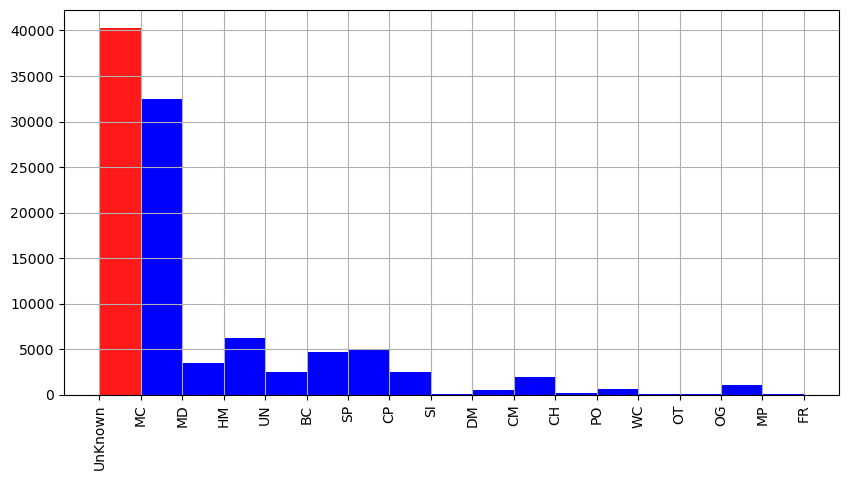

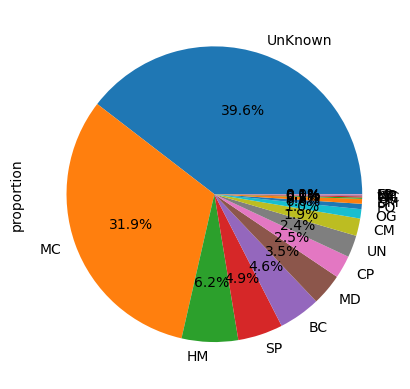

In [169]:
def values_hist(i, data, j, k):
    %matplotlib inline    
    fig = plt.figure()
    fig.set_size_inches(10, 5)
    
    v_list = data[atr[i]]
    v_list_unk = v_list.copy()
    v_list_unk = v_list_unk.replace(np.NaN, "UnKnown")
    #print(type(v_list_unk[1]))
    #print(v_list)
    #print(v_list_unk)
    temp = data[[atr[i], 'readmitted']]
    print(temp.describe(include='all'))
    print('____________________________')
    
    tempdata = data[atr[i]].copy()
    tempdata = tempdata.replace(np.NaN, "UnKnown")
    #print(tempdata)
    values_list = data.value_counts(atr[i], normalize=False, sort=True)
    values_list2 = tempdata.value_counts(atr[i], sort=True)
    values_list = pd.DataFrame(values_list)
    values_list2 = pd.DataFrame(values_list2)
    
    v_len = len(values_list)
    print(v_len)
    v_len2 = len(values_list2)
    print(v_len2)
    
    print('____________________________')
    print("Data type of attribute", atr[i], '-', data[atr[10]].dtypes)
    #if
    #bins_len  5-6 - 6/6  9-10 - 9/8   17 - 18 - 17/16 72 - 73 - 73/73
    v_list_unk = v_list_unk.hist(bins=v_len2-j, alpha=0.9, color='red', xrot=90, stacked=True)
    v_list = v_list.hist(bins=v_len2-k, alpha=1, color='blue', xrot=90)
    
    figure = values_list2.plot.pie(subplots=True, legend=False, autopct='%1.1f%%')
    return 0

values_hist(10, data, 1, 2)

        gender readmitted
count   101763     101766
unique       2          3
top     Female         NO
freq     54708      54864
____________________________
2
3
____________________________
Data type of attribute gender - object


0

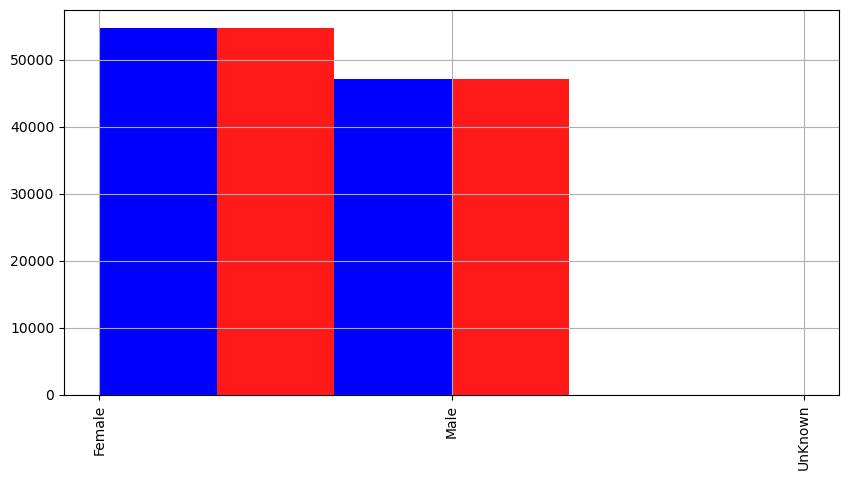

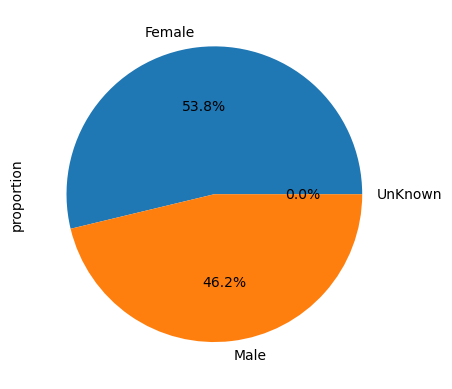

In [170]:
values_hist(3, data,0,0)

## Conclusion:

Statistical distribution of several parameters potentially influencing the "readmitted" attribute was derived

## 9. Take several potentially unaffected values ​​of the readmitted variable and plot the numerical distribution of unique values ​​of each attribute across the data set. Plot pie charts for each attribute. Draw conclusions about the influence of attributes.

For the readmission variable, the following attributes may be excluded from the analysis:

Patient identifier: This is not directly related to readmission and can be considered a random identifier.

Admission diagnosis: The admission diagnosis variable may be useful for understanding the reasons for readmission, but the baseline hospitalization variable may be sufficient for the readmission analysis.

Duration of hospitalization: This variable may be useful for the analysis, but excluding it from the analysis may be appropriate for the limited purposes of analyzing readmissions.

Type of treatment or procedure: Depending on the purposes of the analysis, variables related to the type of treatment or procedure may be excluded from the readmission analysis.

In general, the choice of attributes to exclude depends on the specific purposes of the study and the availability of data.

        discharge_disposition_id readmitted
count                     101766     101766
unique                        26          3
top                            1         NO
freq                       60234      54864
____________________________
26
26
____________________________
Data type of attribute discharge_disposition_id - object


0

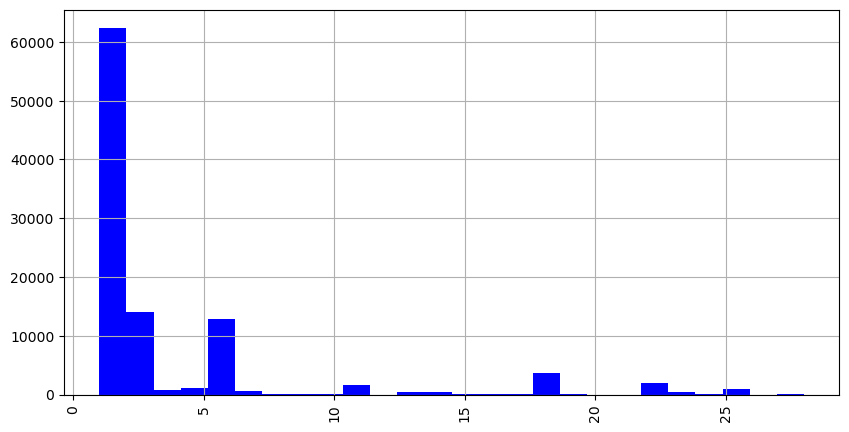

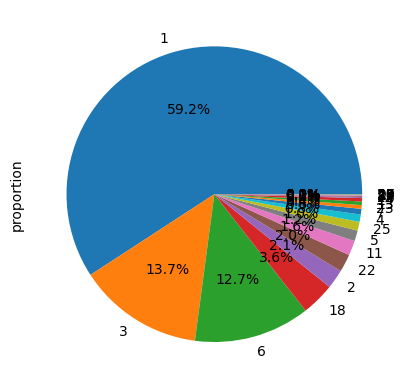

In [177]:
values_hist(7, data,0,0)

        gender readmitted
count   101763     101766
unique       2          3
top     Female         NO
freq     54708      54864
____________________________
2
3
____________________________
Data type of attribute gender - object


0

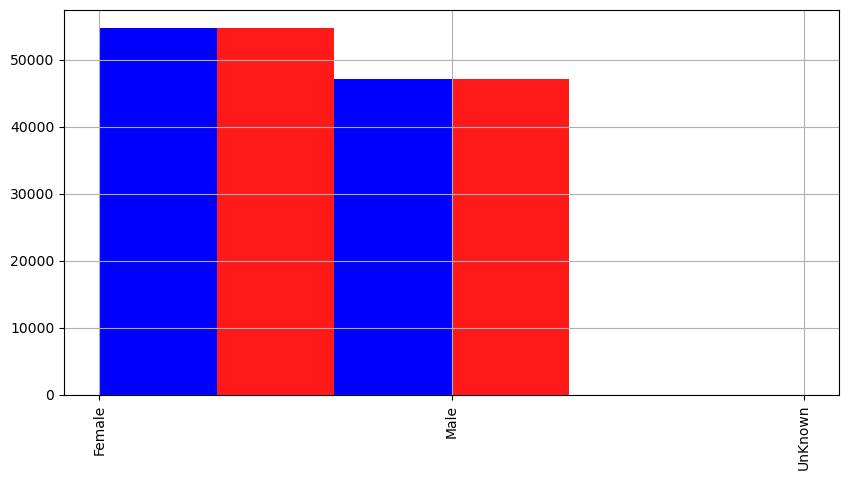

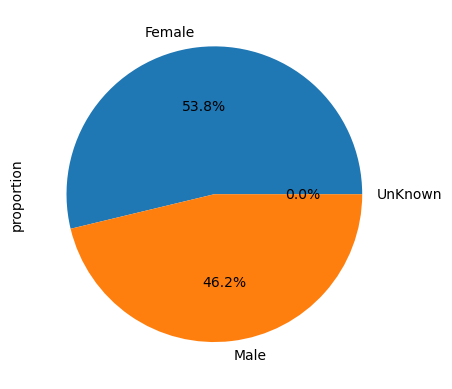

In [179]:
values_hist(3, data,0,0)

## Conclusion:
We derived the statistical distribution of several parameters that potentially do not affect the "readmitted" attribute

## 11. Take one of the attributes influencing the readmitted variable, group the attribute values ​​and count the pairs of values ​​by the data frame. Calculate the percentage of the obtained statistics with the total amount of data (calculate the percentage). Output a column chart.

number_inpatient  readmitted
0                 <30            5706
                  >30           20328
                  NO            41596
1                 <30            2523
                  >30            8167
                  NO             8831
2                 <30            1319
                  >30            3594
                  NO             2653
3                 <30             692
                  >30            1686
                  NO             1033
4                 <30             383
                  >30             821
                  NO              418
5                 <30             255
                  >30             395
                  NO              162
6                 <30             166
                  >30             238
                  NO               76
7                 <30              95
                  >30             122
                  NO               51
8                 <30              67
                  >30

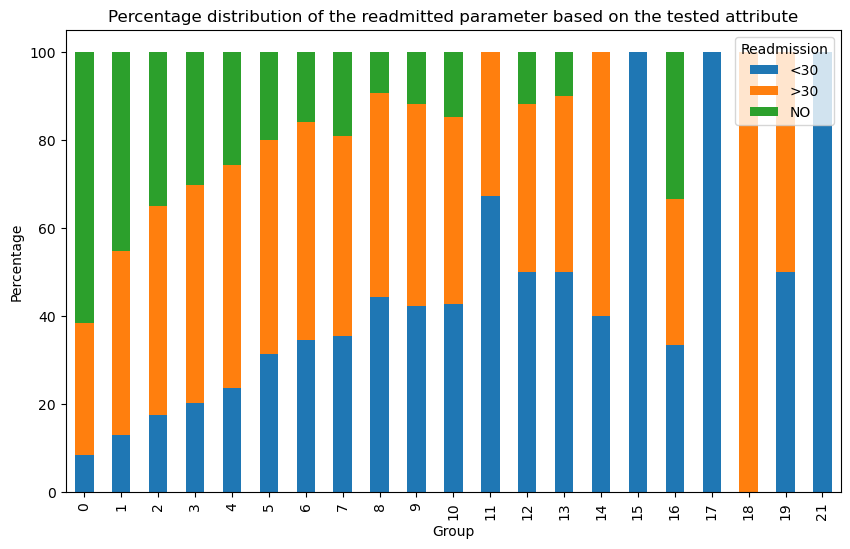

0

In [183]:
# Grouping by attribute atr[i] and counting pairs of values with the variable 'readmitted'
def groupData(i, data):
    grouped_data = data.groupby([atr[i], 'readmitted'])
    print(grouped_data)
    grouped_data = grouped_data.size()
    print(grouped_data)
    grouped_data = grouped_data.unstack()
    print(grouped_data)
    
    # Calculating percentage distribution
    total_counts = grouped_data.sum(axis=1)
    print(total_counts)
    percentage_data = grouped_data.divide(total_counts, axis=0) * 100

    # Plotting a bar chart
    percentage_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Percentage distribution of the readmitted parameter based on the tested attribute')
    plt.xlabel('Group')
    plt.ylabel('Percentage')
    plt.legend(title='Readmission', loc='upper right')
    plt.show()
    return 0

groupData(17, data)

## Вывод:

## 12. Сделать выводы и сформировать отчет аналогично требованиям описанным в первой лабораторной работе.

## Lab work summary:

#### The following steps were performed during the lab work:

Data analysis:

- The provided data was analyzed, the main characteristics of the dataset were studied.
- Unique attributes and their impact on the readmitted variable were identified.
Data visualization:
- Various graphs (bar charts, pie charts) were constructed to visualize the distribution of values ​​of some attributes and their impact on the readmitted variable.
- The distribution of values ​​of the attributes race, weight, diag_1, diag_2, diag_3, max_glu_serum, A1Cresult, examide, citoglipton and their relationship with the readmitted variable were visualized.
  
Data grouping:

- Data was grouped by some attributes and pivot tables were analyzed to assess the impact of attribute values ​​on the readmitted variable.
- Attributes with the greatest impact on rehospitalization were identified.
  
Value replacement:
- Values ​​in one of the attributes were replaced to improve data quality.
- Thus, the goal of the work has been achieved, and the steps taken allow one to master the basic skills of primary data processing in the Anaconda environment using Jupyter Notebook.